In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [ ]:
crime_data = pd.read_excel("2021 5대범죄 발생현황.xlsx")
streetlamp_data = pd.read_excel("2021 가로등.xlsx" )
cctv_data = pd.read_excel("2021 방범용 cctv.xlsx")
center_data  = pd.read_excel("2021 경찰,소방관서.xlsx")
map_data = gpd.read_file("sig.shp")
district_id = pd.read_excel("자치구행정코드.xlsx")
district_center = pd.read_excel("자치구좌표.xlsx")
population_data = pd.read_excel("구별주민등록인구.xlsx")
gu_total = pd.read_excel("통합데이터.xlsx")
ansim_data = pd.read_excel("2021 안심귀가스카우트 이용현황.xlsx")
year_cctv = pd.read_excel("연도별 cctv.xlsx")
year_crime = pd.read_excel("연도별 5대범죄.xlsx")
year_population = pd.read_excel("연도별 인구수.xlsx")
year_streetlamp = pd.read_excel("연도별 가로등.xlsx")
year_ansim = pd.read_excel("연도별 안심귀가.xlsx")

In [ ]:
print(district_id.head(30))

     행정코드  자치구명
0   11110   종로구
1   11140    중구
2   11170   용산구
3   11200   성동구
4   11215   광진구
5   11230  동대문구
6   11260   중랑구
7   11290   성북구
8   11305   강북구
9   11320   도봉구
10  11350   노원구
11  11380   은평구
12  11410  서대문구
13  11440   마포구
14  11470   양천구
15  11500   강서구
16  11530   구로구
17  11545   금천구
18  11560  영등포구
19  11590   동작구
20  11620   관악구
21  11650   서초구
22  11680   강남구
23  11710   송파구
24  11740   강동구


In [ ]:
crime_1 = crime_data.rename(columns={"자치구": "district", "발생": "cnt"})
crime_sorted = crime_1.sort_values(by='cnt', ascending=False)

print(crime_1.head())

  district   cnt
0      종로구  2712
1       중구  2861
2      용산구  2381
3      성동구  2112
4      광진구  3087


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False #축의 음수 기호 표시

In [ ]:
print(crime_1.columns)

Index(['district', 'cnt'], dtype='object')


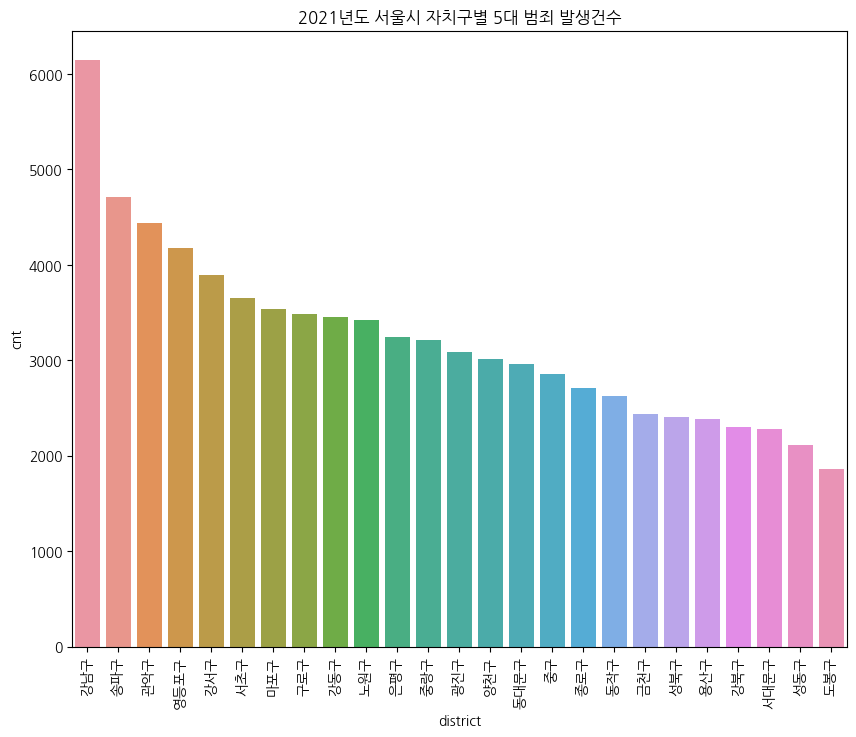

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x="district", y="cnt", data=crime_1.sort_values('cnt', ascending=False))
#plt.xlabel('자치구')
#plt.ylabel('발생')
plt.title("2021년도 서울시 자치구별 5대 범죄 발생건수")
plt.xticks(rotation=90)
plt.show()

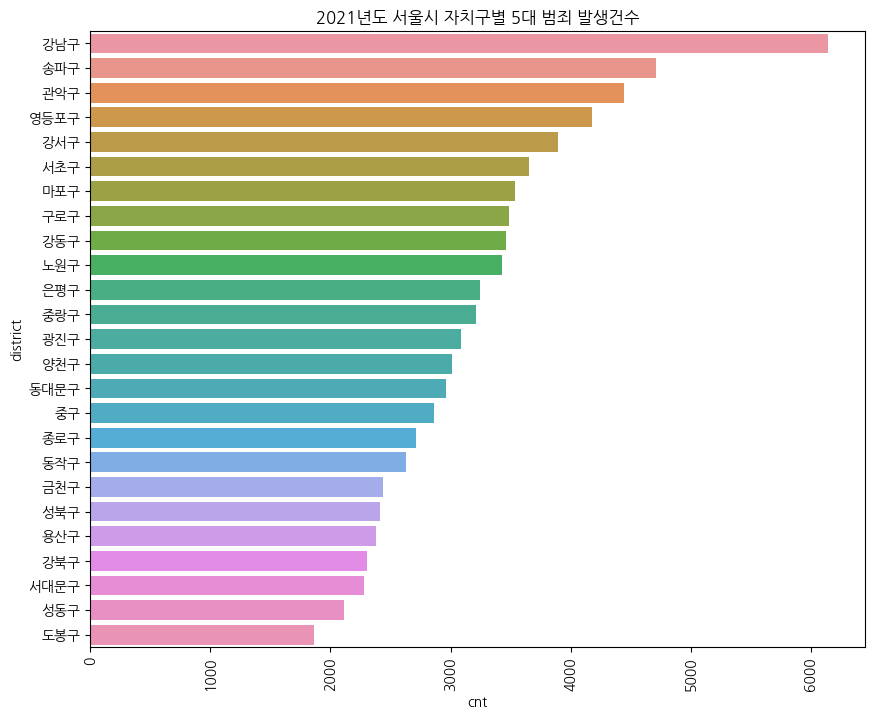

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x="cnt", y="district", data=crime_1.sort_values('cnt', ascending=False))
#plt.xlabel('발생')
#plt.ylabel('자치구')
plt.title("2021년도 서울시 자치구별 5대 범죄 발생건수")
plt.xticks(rotation=90)
plt.show()

In [ ]:
import geopandas as gpd

gdf = gpd.read_file("sig.shp")
gdf.crs = "EPSG:5179"

# 좌표 체계를 matplotlib와 호환되는 EPSG:3857로 변환
gdf = gdf.to_crs(epsg=3857)

code_seoul_b = district_id.rename(columns={'자치구명': 'district'})
dis2_1 = district_center.rename(columns={'X': 'long', 'Y': 'lat', '코드': 'id', '시군구명': 'district'})
b = crime_data.rename(columns={'자치구': 'district', '발생': 'cnt'})
b['id'] = code_seoul_b['행정코드']
b['long'] = dis2_1['long']
b['lat'] = dis2_1['lat']
cntMax = b['cnt'].max()

In [ ]:
print(b)

   district   cnt     id        long        lat
0       종로구  2712  11110  126.977321  37.594917
1        중구  2861  11140  126.995968  37.560144
2       용산구  2381  11170  126.979907  37.531385
3       성동구  2112  11200  127.041059  37.551030
4       광진구  3087  11215  127.085744  37.546706
5      동대문구  2959  11230  127.054848  37.581957
6       중랑구  3210  11260  127.092880  37.597803
7       성북구  2411  11290  127.017579  37.605702
8       강북구  2301  11305  127.011189  37.643474
9       도봉구  1860  11320  127.032369  37.669102
10      노원구  3425  11350  127.075035  37.652511
11      은평구  3244  11380  126.927023  37.619211
12     서대문구  2278  11410  126.939063  37.577785
13      마포구  3540  11440  126.908270  37.559313
14      양천구  3015  11470  126.855478  37.524789
15      강서구  3896  11500  126.822807  37.561235
16      구로구  3486  11530  126.856301  37.494405
17      금천구  2439  11545  126.900820  37.460568
18     영등포구  4179  11560  126.910169  37.522308
19      동작구  2631  11590  126.951641  37

In [ ]:
!pip install mapclassify

In [ ]:
seoul_map = map_data[map_data['SIG_CD'] <= '11740']

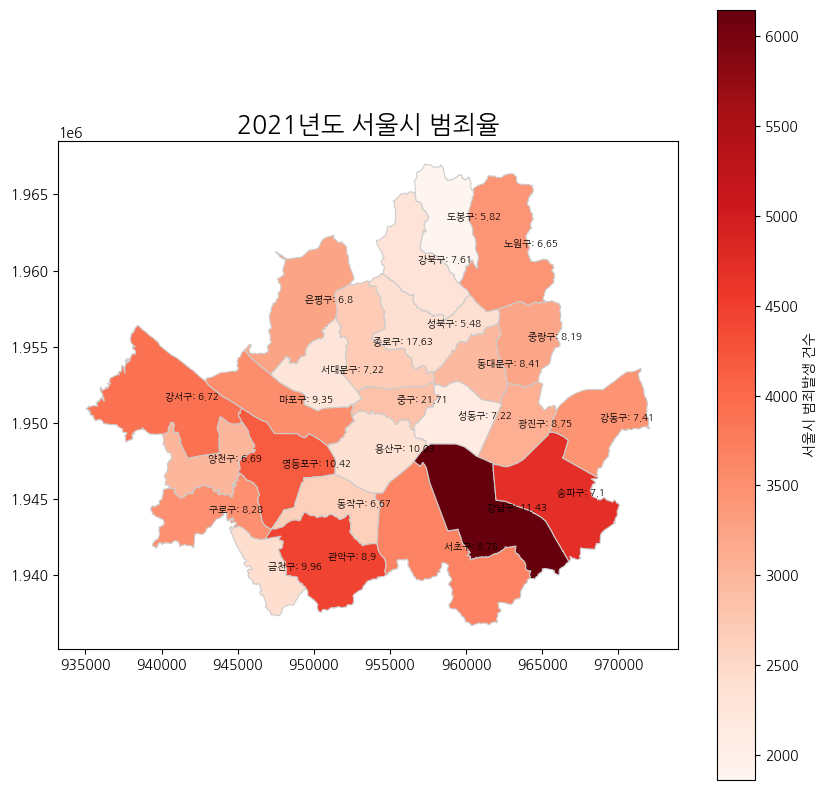

   district   cnt     id        long        lat  population  crime_rate
0       종로구  2712  11110  126.977321  37.594917      153789   17.634551
1        중구  2861  11140  126.995968  37.560144      131787   21.709273
2       용산구  2381  11170  126.979907  37.531385      237285   10.034347
3       성동구  2112  11200  127.041059  37.551030      292672    7.216269
4       광진구  3087  11215  127.085744  37.546706      352627    8.754293
5      동대문구  2959  11230  127.054848  37.581957      352006    8.406107
6       중랑구  3210  11260  127.092880  37.597803      391885    8.191179
7       성북구  2411  11290  127.017579  37.605702      440142    5.477778
8       강북구  2301  11305  127.011189  37.643474      302563    7.605028
9       도봉구  1860  11320  127.032369  37.669102      319373    5.823911
10      노원구  3425  11350  127.075035  37.652511      514946    6.651183
11      은평구  3244  11380  126.927023  37.619211      477173    6.798373
12     서대문구  2278  11410  126.939063  37.577785      315659    7

In [ ]:
import mapclassify
seoul_map = seoul_map.copy()

seoul_map.rename(columns={'SIG_CD': 'id'}, inplace=True)
seoul_map['id'] = seoul_map['id'].astype(str)
b['id'] = b['id'].astype(str)

population_data.rename(columns = {'자치구' : 'district', '인구수' : 'population'}, inplace = True)
merged_b = pd.merge(b, population_data, on = 'district')

merged_b['crime_rate'] = merged_b['cnt'] / merged_b['population'] * 1000

merged_data = pd.merge(seoul_map, merged_b[['id', 'crime_rate', 'cnt', 'district']], on='id')

# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))  # figsize 인자 추가
merged_data.plot(column='cnt', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
         legend_kwds={'label': "서울시 범죄발생 건수", 'orientation': "vertical"})

# 텍스트 추가
for idx, row in merged_data.iterrows():
    plt.text(x=row['geometry'].centroid.x, y=row['geometry'].centroid.y,
             s=row['district'] + ': ' + str(round(row['crime_rate'], 2)), fontsize=7)


plt.title('2021년도 서울시 범죄율', fontsize=18)
plt.show()

print(merged_b)

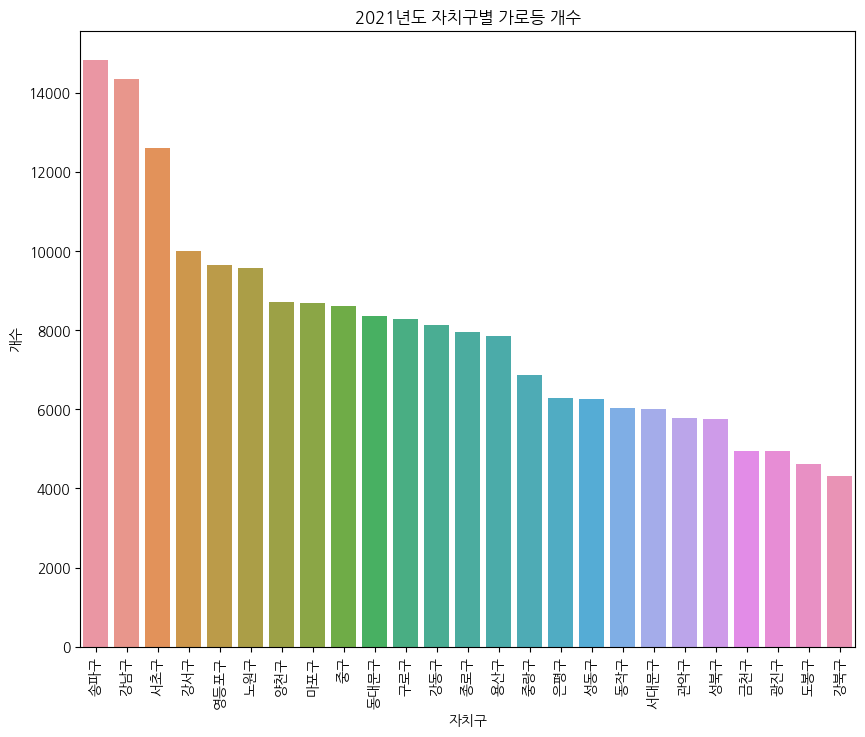

correlation:  0.7652451705650486
p-value:  8.342568287320919e-06
intercept:  [1139.80428634]
slope:  [[0.26061863]]


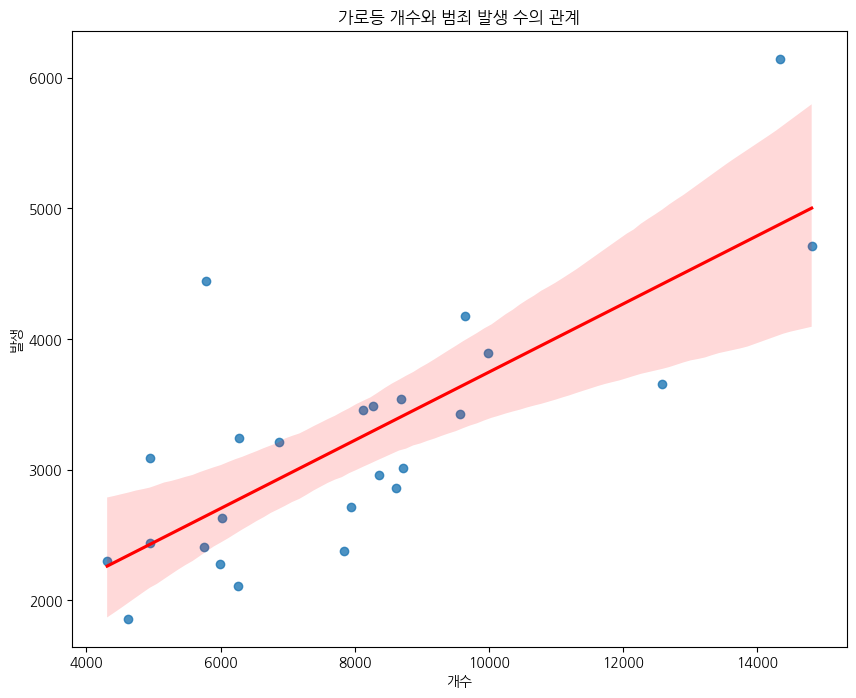

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

# 데이터 병합
crime_lamp_data = pd.merge(crime_data, streetlamp_data, how='left', on='자치구')
crime_lamp_data = crime_lamp_data.sort_values('개수', ascending = False)

# 가로등 개수에 따른 막대그래프
plt.figure(figsize=(10,8))
sns.barplot(x='자치구', y='개수', data=crime_lamp_data, errorbar=None)
plt.title('2021년도 자치구별 가로등 개수')
plt.xticks(rotation=90)
plt.show()

# 상관분석
correlation, p_value = pearsonr(crime_lamp_data['발생'], crime_lamp_data['개수'])
print('correlation: ', correlation)
print('p-value: ', p_value)

# 회귀분석
X = crime_lamp_data['개수'].values.reshape(-1,1)
y = crime_lamp_data['발생'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

print('intercept: ', reg.intercept_)
print('slope: ', reg.coef_)

# 회귀선 그래프
plt.figure(figsize=(10,8))
sns.regplot(x='개수', y='발생', data=crime_lamp_data, line_kws={'color': 'red'})
plt.title('가로등 개수와 범죄 발생 수의 관계')
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 데이터 병합
crime_lamp_data.rename(columns={"자치구": "district", "발생": "cnt", "개수": "streetlights"}, inplace=True)
crime_lamp_1 = pd.merge(code_seoul_b, crime_lamp_data, on='district')

crime_lamp_1.rename(columns={"행정코드" : "id"}, inplace=True)
seoul_map['id'] = seoul_map['id'].astype(int)
crime_lamp_1['id'] = crime_lamp_1['id'].astype(int)

lamp_merge = pd.merge(seoul_map, crime_lamp_1, on='id')



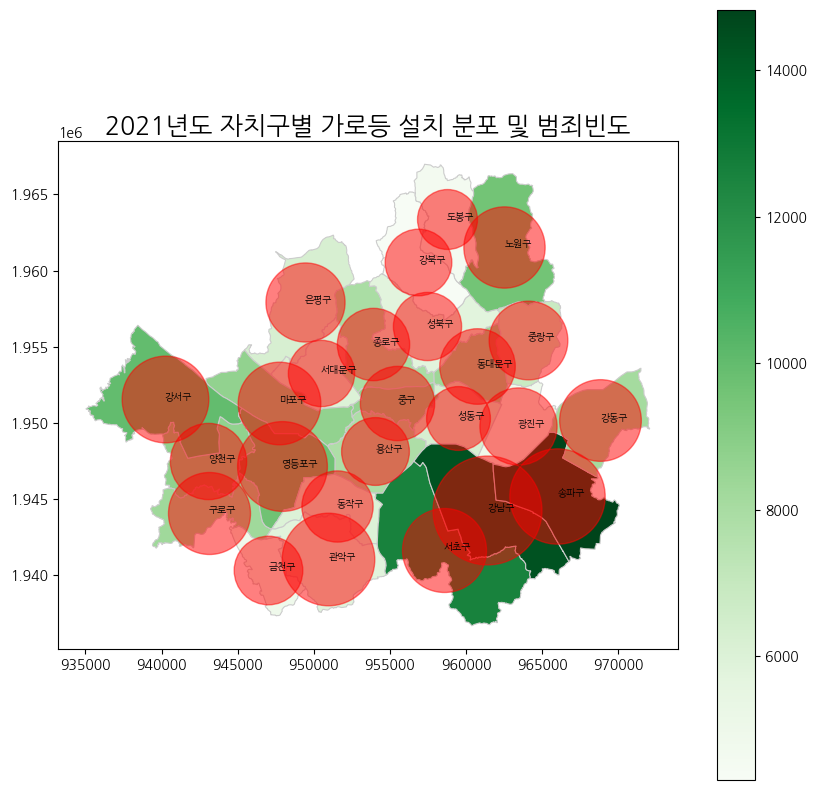

In [ ]:
# 가로등 설치 개수에 따른 원의 크기를 조절하는 함수
def scale(count):
    return count * 1  # 원의 크기를 결정하는 계수를 조절할 수 있습니다.

# 지도 데이터를 geopandas 데이터프레임으로 변환
gdf = gpd.GeoDataFrame(lamp_merge)

# 지도 시각화
fig, ax = plt.subplots(1, figsize=(10, 10))
gdf.plot(column='streetlights', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# 원을 그립니다. 원의 중심점은 자치구의 중심점이고, 원의 크기는 가로등의 개수에 비례합니다.
for idx, row in gdf.iterrows():
    plt.scatter(x=row['geometry'].centroid.x, y=row['geometry'].centroid.y,
                s=scale(row['cnt']), color='red', alpha=0.5)

# 텍스트 추가
for idx, row in gdf.iterrows():
    plt.text(x=row['geometry'].centroid.x, y=row['geometry'].centroid.y,
             s=row['district'], fontsize=7)

plt.title('2021년도 자치구별 가로등 설치 분포 및 범죄빈도', fontsize=18)
plt.show()


     자치구    개수
0    종로구  1573
1     중구  1911
2    용산구  2321
3    성동구  3519
4    광진구  3111
5   동대문구  2471
6    중랑구  3592
7    성북구  3815
8    강북구  2960
9    도봉구  1684
10   노원구  2171
11   은평구  3822
12  서대문구  2591
13   마포구  2372
14   양천구  3393
15   강서구  2637
16   구로구  3842
17   금천구  2276
18  영등포구  3508
19   동작구  2181
20   관악구  3833
21   서초구  3442
22   강남구  6143
23   송파구  2520
24   강동구  2720


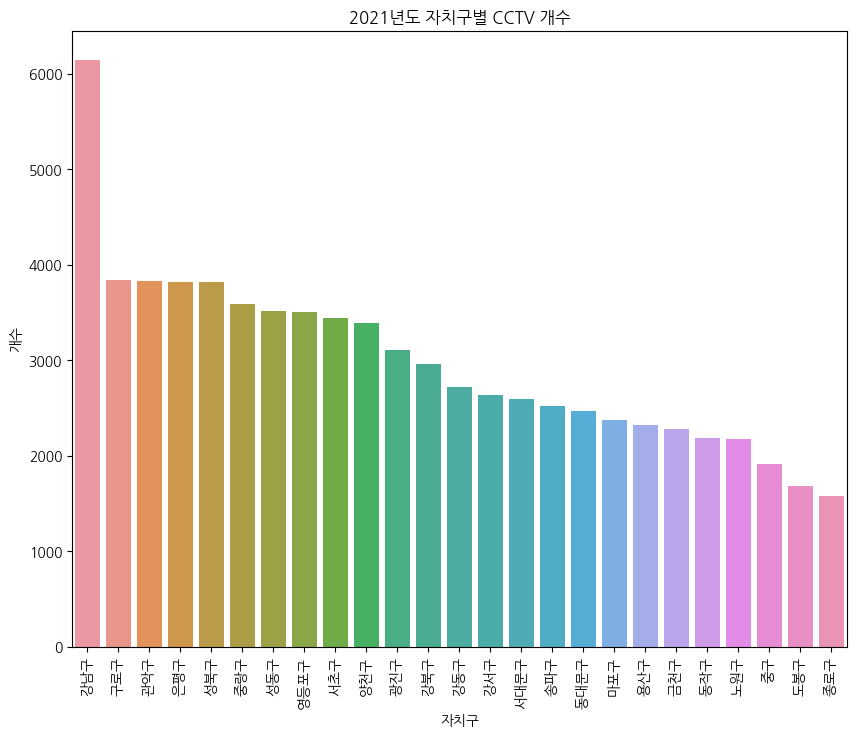

correlation:  0.6103109029503212
p-value:  0.0011962542220502216
intercept:  [1428.16961705]
slope:  [[0.60128964]]


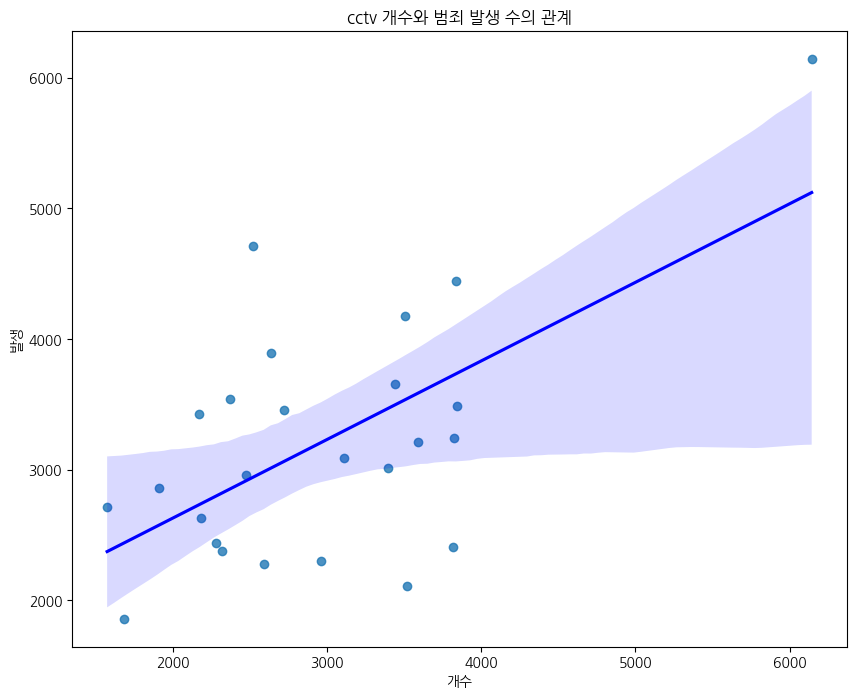

In [ ]:
print(cctv_data)
# 데이터 병합
crime_cctv_data = pd.merge(crime_data, cctv_data, how='left', on='자치구')
crime_cctv_data = crime_cctv_data.sort_values('개수', ascending = False)

# 가로등 개수에 따른 막대그래프
plt.figure(figsize=(10,8))
sns.barplot(x='자치구', y='개수', data=crime_cctv_data, errorbar=None)
plt.title('2021년도 자치구별 CCTV 개수')
plt.xticks(rotation=90)
plt.show()

# 상관분석
correlation, p_value = pearsonr(crime_cctv_data['발생'], crime_cctv_data['개수'])
print('correlation: ', correlation)
print('p-value: ', p_value)

# 회귀분석
X = crime_cctv_data['개수'].values.reshape(-1,1)
y = crime_cctv_data['발생'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

print('intercept: ', reg.intercept_)
print('slope: ', reg.coef_)

# 회귀선 그래프
plt.figure(figsize=(10,8))
sns.regplot(x='개수', y='발생', data=crime_cctv_data, line_kws={'color': 'blue'})
plt.title('cctv 개수와 범죄 발생 수의 관계')
plt.show()


In [ ]:
# 데이터 병합
crime_cctv_data.rename(columns={"자치구": "district", "발생": "cnt", "개수": "cctv"}, inplace=True)
crime_cctv_1 = pd.merge(code_seoul_b, crime_cctv_data, on='district')

crime_cctv_1.rename(columns={"행정코드" : "id"}, inplace=True)
seoul_map['id'] = seoul_map['id'].astype(int)
crime_cctv_1['id'] = crime_cctv_1['id'].astype(int)

cctv_merge = pd.merge(seoul_map, crime_cctv_1, on='id')

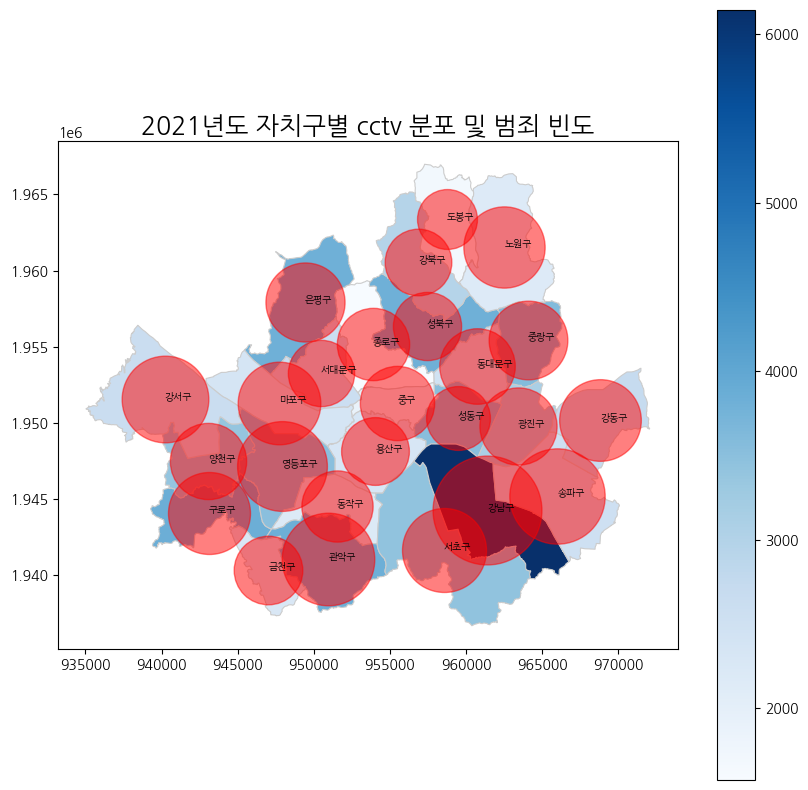

In [ ]:
# 가로등 설치 개수에 따른 원의 크기를 조절하는 함수
def scale(count):
    return count * 1  # 원의 크기를 결정하는 계수를 조절할 수 있습니다.

# 지도 데이터를 geopandas 데이터프레임으로 변환
gdf = gpd.GeoDataFrame(cctv_merge)

# 지도 시각화
fig, ax = plt.subplots(1, figsize=(10, 10))
gdf.plot(column='cctv', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# 원을 그립니다. 원의 중심점은 자치구의 중심점이고, 원의 크기는 cctv 개수에 비례합니다.
for idx, row in gdf.iterrows():
    plt.scatter(x=row['geometry'].centroid.x, y=row['geometry'].centroid.y,
                s=scale(row['cnt']), color='red', alpha=0.5)

# 텍스트 추가
for idx, row in gdf.iterrows():
    plt.text(x=row['geometry'].centroid.x, y=row['geometry'].centroid.y,
             s=row['district'], fontsize=7)

plt.title('2021년도 자치구별 cctv 분포 및 범죄 빈도', fontsize=18)
plt.show()


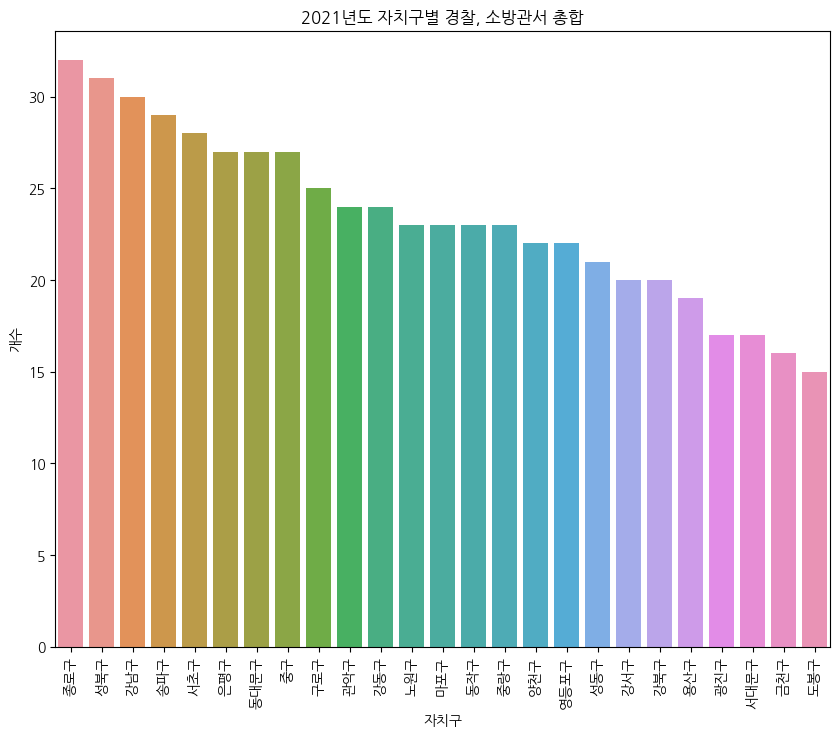

correlation:  0.4520566926770834
p-value:  0.023286598001000382
intercept:  [1073.91849057]
slope:  [[91.61886792]]


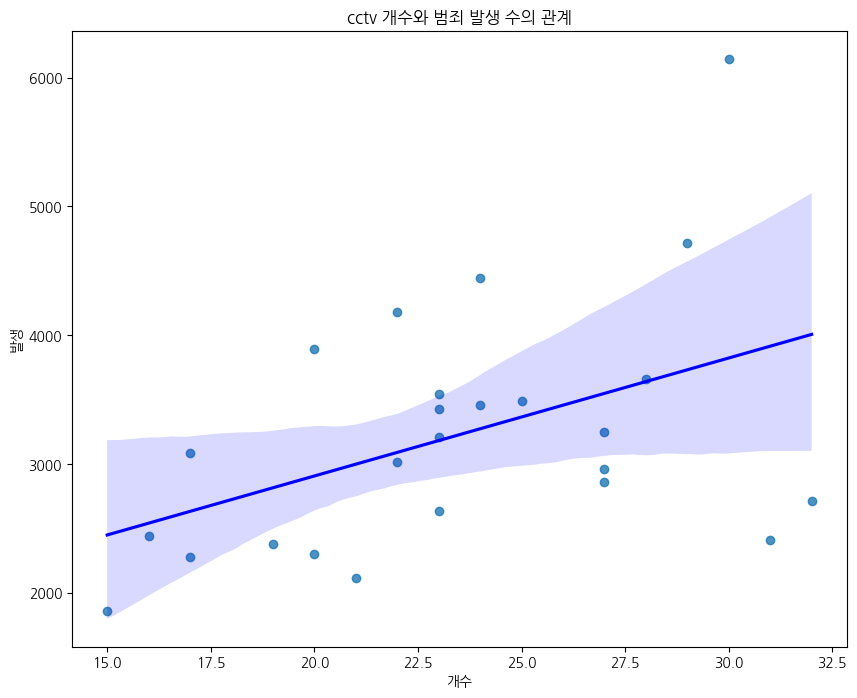

In [ ]:
# 데이터 병합
crime_center_data = pd.merge(crime_data, center_data, how='left', on='자치구')
crime_center_data = crime_center_data.sort_values('개수', ascending = False)

# 가로등 개수에 따른 막대그래프
plt.figure(figsize=(10,8))
sns.barplot(x='자치구', y='개수', data=crime_center_data, errorbar=None)
plt.title('2021년도 자치구별 경찰, 소방관서 총합')
plt.xticks(rotation=90)
plt.show()

# 상관분석
correlation, p_value = pearsonr(crime_center_data['발생'], crime_center_data['개수'])
print('correlation: ', correlation)
print('p-value: ', p_value)

# 회귀분석
X = crime_center_data['개수'].values.reshape(-1,1)
y = crime_center_data['발생'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

print('intercept: ', reg.intercept_)
print('slope: ', reg.coef_)

# 회귀선 그래프
plt.figure(figsize=(10,8))
sns.regplot(x='개수', y='발생', data=crime_center_data, line_kws={'color': 'blue'})
plt.title('cctv 개수와 범죄 발생 수의 관계')
plt.show()




In [ ]:

# 데이터 병합
crime_center_data.rename(columns={"자치구": "district", "발생": "cnt", "개수": "center"}, inplace=True)
crime_center_1 = pd.merge(code_seoul_b, crime_center_data, on='district')

crime_center_1.rename(columns={"행정코드" : "id"}, inplace=True)
seoul_map['id'] = seoul_map['id'].astype(int)
crime_center_1['id'] = crime_center_1['id'].astype(int)

center_merge = pd.merge(seoul_map, crime_center_1, on='id')

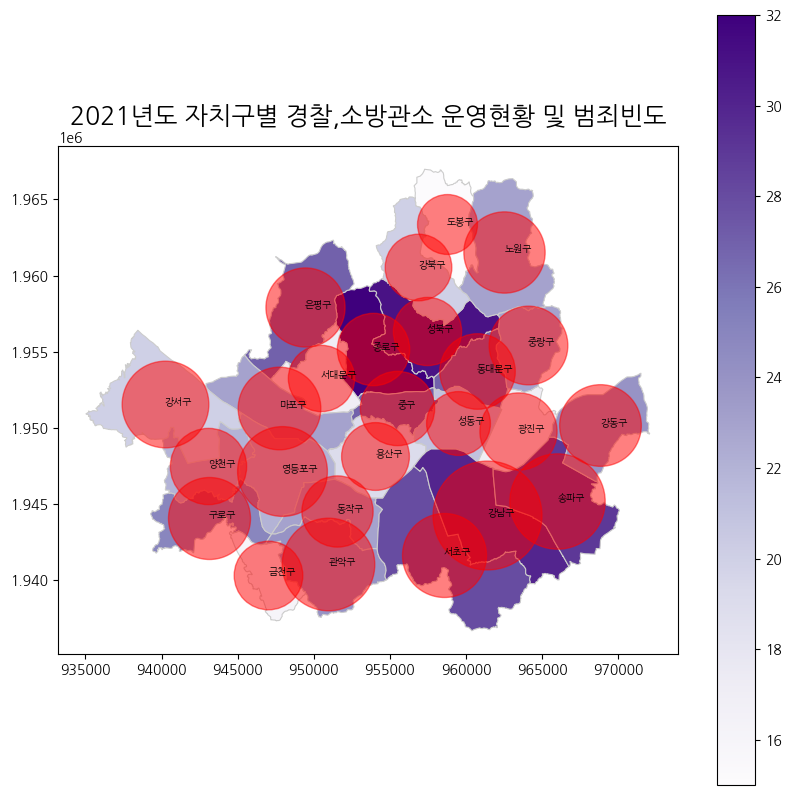

In [ ]:

def scale(count):
    return count * 1  # 원의 크기를 결정하는 계수를 조절할 수 있습니다.

# 지도 데이터를 geopandas 데이터프레임으로 변환
gdf = gpd.GeoDataFrame(center_merge)

# 지도 시각화
fig, ax = plt.subplots(1, figsize=(10, 10))
gdf.plot(column='center', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for idx, row in gdf.iterrows():
    plt.scatter(x=row['geometry'].centroid.x, y=row['geometry'].centroid.y,
                s=scale(row['cnt']), color='red', alpha=0.5)

# 텍스트 추가
for idx, row in gdf.iterrows():
    plt.text(x=row['geometry'].centroid.x, y=row['geometry'].centroid.y,
             s=row['district'], fontsize=7)

plt.title('2021년도 자치구별 경찰,소방관소 운영현황 및 범죄빈도', fontsize=18)
plt.show()


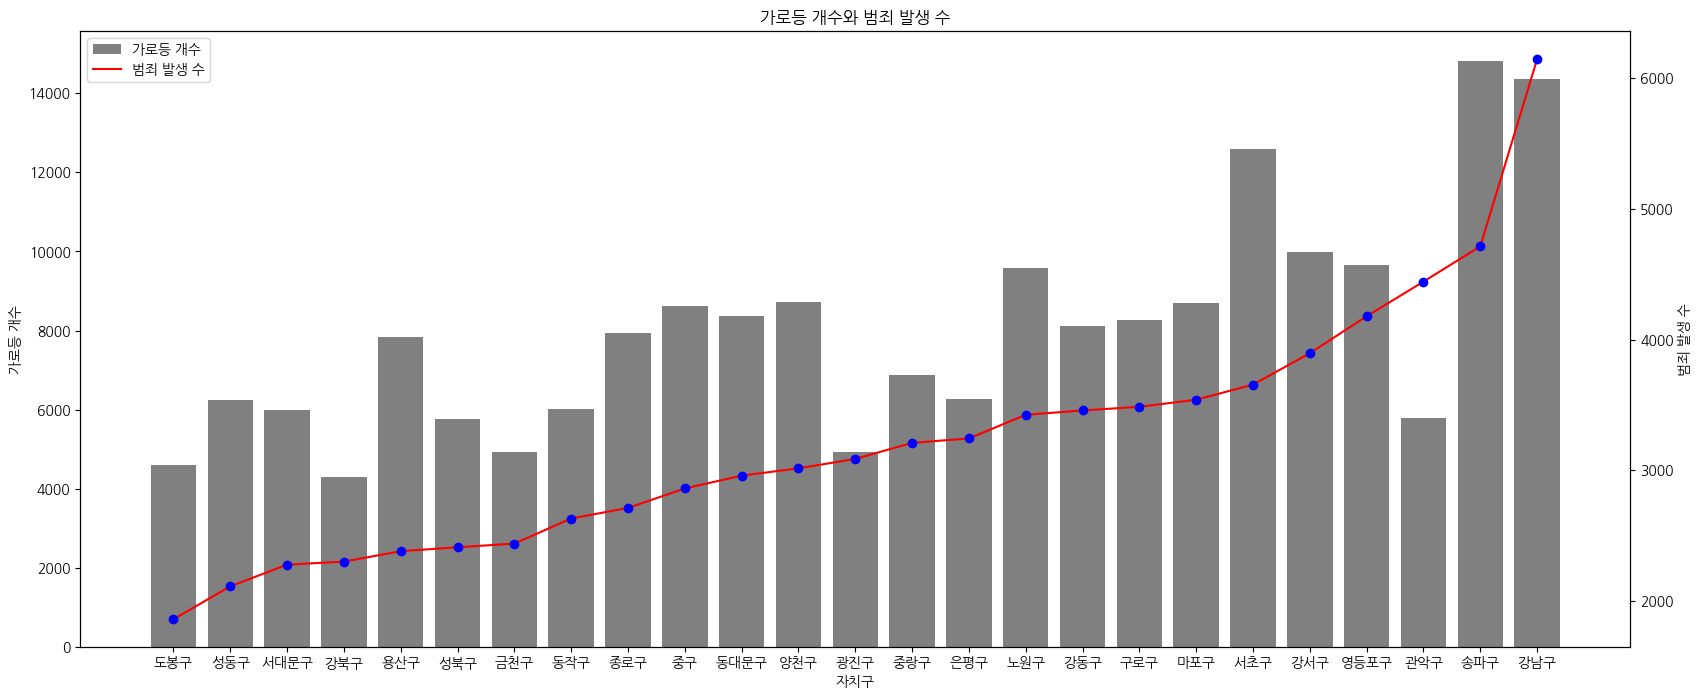

In [ ]:
import matplotlib.pyplot as plt

# 데이터 로드 및 병합
crime_lamp_data = pd.merge(crime_data, streetlamp_data, how='left', on='자치구')

# 데이터 프레임 생성
df = pd.DataFrame(crime_lamp_data)

df = df.sort_values('발생')

# 새로운 figure 생성
fig, ax1 = plt.subplots(figsize=(20,8))

# 막대 그래프 생성
ax1.bar(df['자치구'], df['개수'], label='가로등 개수', color='grey')
ax1.set_xlabel('자치구')
ax1.set_ylabel('가로등 개수')
ax1.tick_params(axis='y')

# 라인 그래프 생성
ax2 = ax1.twinx()
ax2.plot(df['자치구'], df['발생'], label='범죄 발생 수', color='r')
ax2.plot(df['자치구'], df['발생'], 'bo')  # 꼭짓점 추가
ax2.set_ylabel('범죄 발생 수')
ax2.tick_params(axis='y')

# 그래프 제목 설정
plt.title('가로등 개수와 범죄 발생 수')

# 그래프 레이블 설정
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

# x축의 라벨을 90도 회전
plt.xticks(rotation=90)

plt.show()


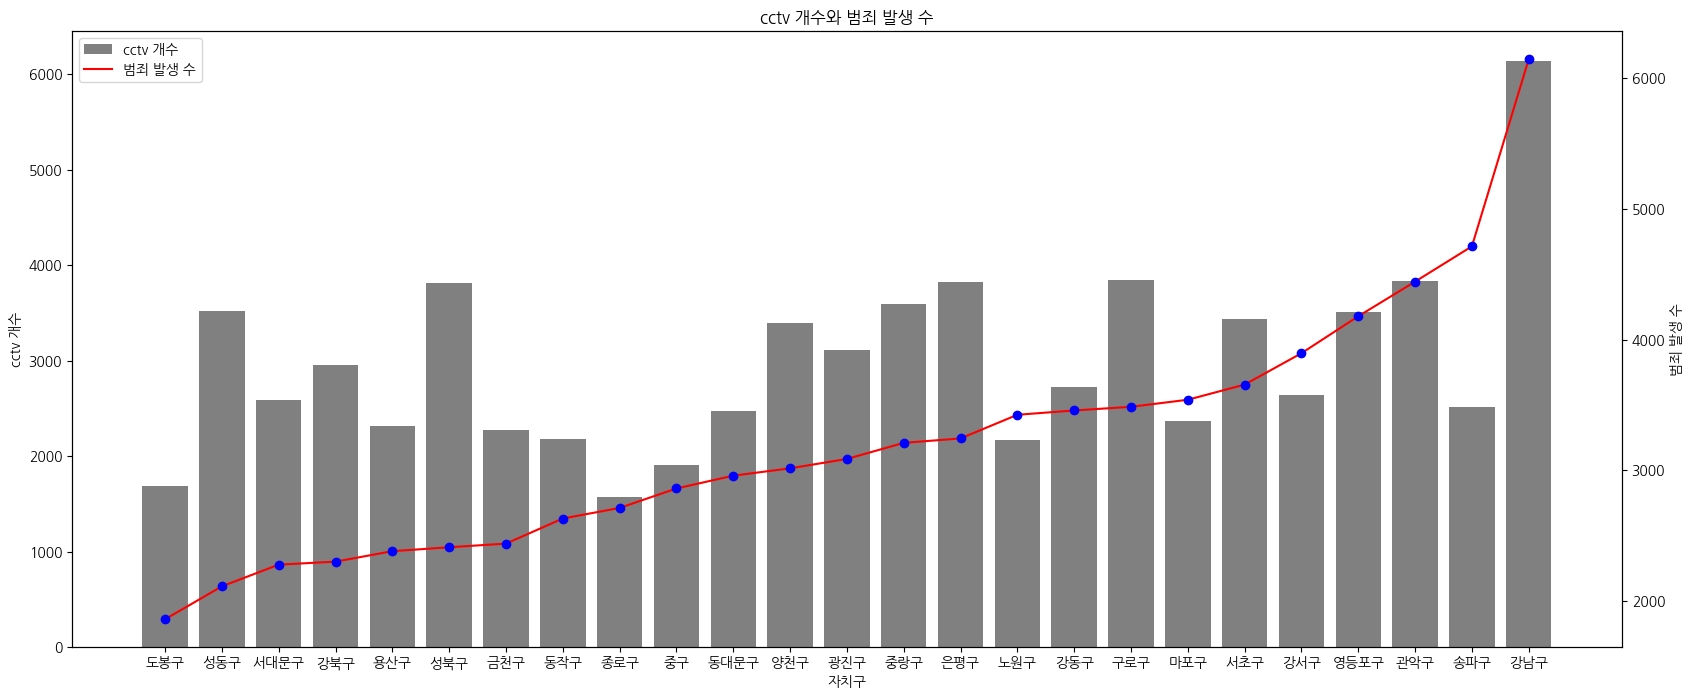

In [ ]:
crime_cctv_data = pd.merge(crime_data, cctv_data, how='left', on='자치구')

# 데이터 프레임 생성
df = pd.DataFrame(crime_cctv_data)
df = df.sort_values('발생')

# 새로운 figure 생성
fig, ax1 = plt.subplots(figsize=(20,8))

# 막대 그래프 생성
ax1.bar(df['자치구'], df['개수'], label='cctv 개수', color='grey')
ax1.set_xlabel('자치구')
ax1.set_ylabel('cctv 개수')
ax1.tick_params(axis='y')

# 라인 그래프 생성
ax2 = ax1.twinx()
ax2.plot(df['자치구'], df['발생'], label='범죄 발생 수', color='r')
ax2.plot(df['자치구'], df['발생'], 'bo')  # 꼭짓점 추가
ax2.set_ylabel('범죄 발생 수')
ax2.tick_params(axis='y')

# 그래프 제목 설정
plt.title('cctv 개수와 범죄 발생 수')

# 그래프 레이블 설정
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

# x축의 라벨을 90도 회전
plt.xticks(rotation=90)

plt.show()


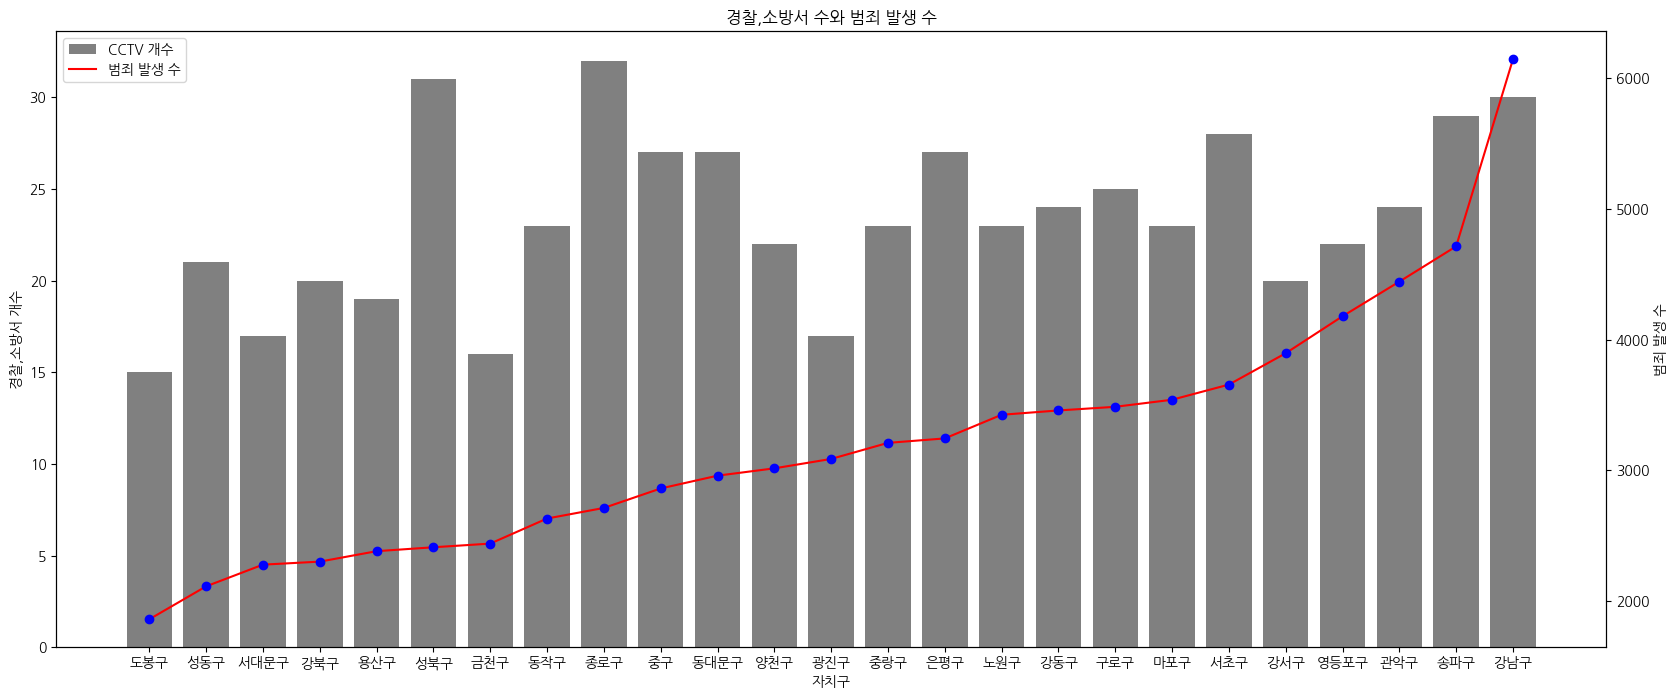

In [ ]:
crime_center_data = pd.merge(crime_data, center_data, how='left', on='자치구')
# 데이터 프레임 생성
df = pd.DataFrame(crime_center_data)
df = df.sort_values('발생')

# 새로운 figure 생성
fig, ax1 = plt.subplots(figsize=(20,8))

# 막대 그래프 생성
ax1.bar(df['자치구'], df['개수'], label='CCTV 개수', color='grey')
ax1.set_xlabel('자치구')
ax1.set_ylabel('경찰,소방서 개수')
ax1.tick_params(axis='y')

# 라인 그래프 생성
ax2 = ax1.twinx()
ax2.plot(df['자치구'], df['발생'], label='범죄 발생 수', color='r')
ax2.plot(df['자치구'], df['발생'], 'bo')  # 꼭짓점 추가
ax2.set_ylabel('범죄 발생 수')
ax2.tick_params(axis='y')

# 그래프 제목 설정
plt.title('경찰,소방서 수와 범죄 발생 수')

# 그래프 레이블 설정
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

# x축의 라벨을 90도 회전
plt.xticks(rotation=90)

plt.show()


In [ ]:
#cctv, 가로등, 경찰/소방관서 설치율은 범죄발생율에 크게 영향을 주지 않는 것으로 결과가 도출되었음
#주요 원인으로는 도봉구, 종로구의 압도적으로 낮고 높은 범죄율과 설치율의 영향으로 예상함
#상, 하위 2개 구를 이상치로 분류하여 재분석 할 경우 유의미한 결과가 도출되지 않을가 생각함
#cctv 설치에 따른 검거율에 대한 분석을 실시해 볼 필요 있음


     자치구   이용실적  인원수
0    종로구   8586   14
1     중구   3570   16
2    용산구   2981   13
3    성동구   8518   19
4    광진구   5733   13
5   동대문구  19085   17
6    중랑구   6889   17
7    성북구   1647   27
8    강북구   6867   25
9    도봉구   4070   16
10   노원구   3414   20
11   은평구    590   24
12  서대문구   6225   15
13   마포구   6588   15
14   양천구   4547   11
15   강서구   1670   21
16   구로구   4842   24
17   금천구   9745   24
18  영등포구   1681   21
19   동작구  16761   25
20   관악구  12780   29
21   서초구   8265   32
22   강남구   7563   19
23   송파구  19450   22
24   강동구   5738   21


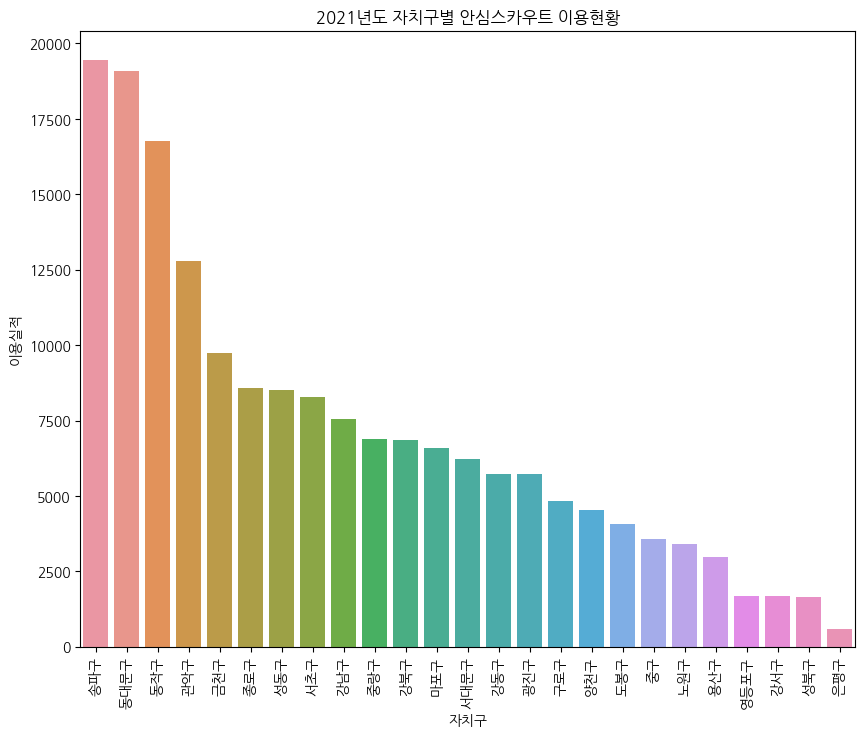

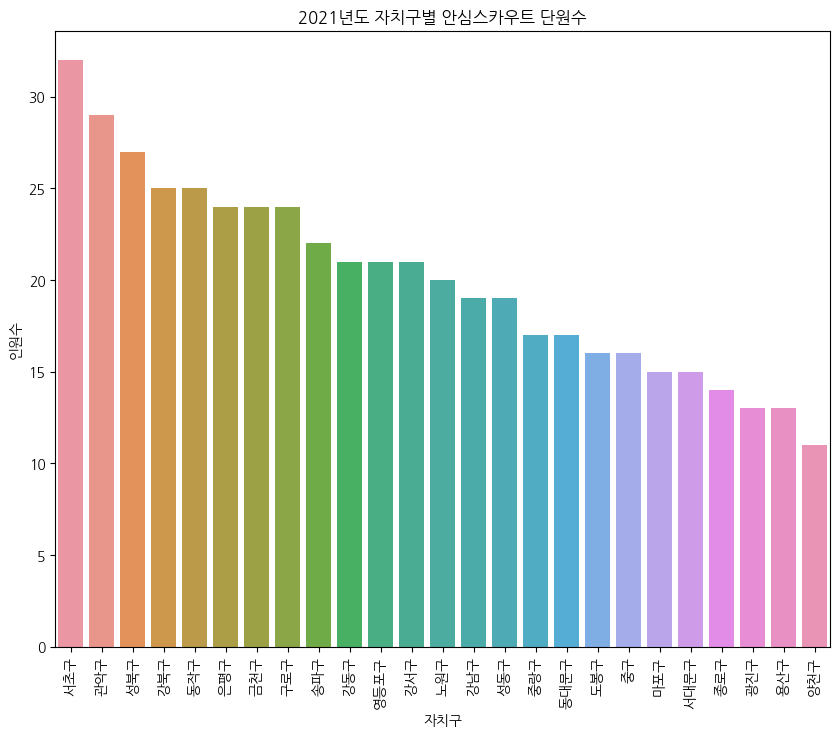

correlation:  0.1548055149698234
p-value:  0.45998465161378455
intercept:  [3013.80593249]
slope:  [[0.02868227]]


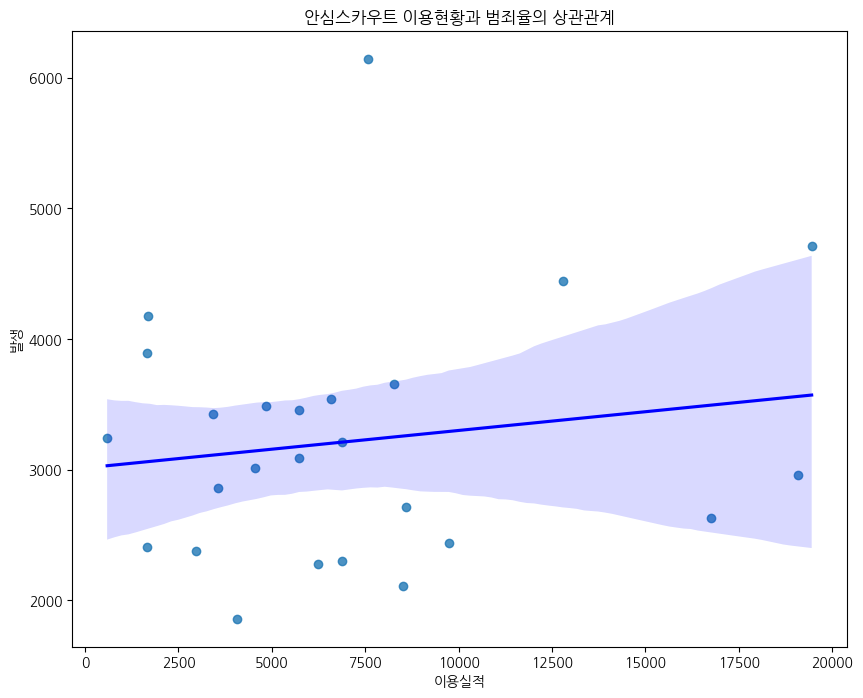

In [ ]:
print(ansim_data)
# 데이터 병합
crime_ansim_data = pd.merge(crime_data, ansim_data, how='left', on='자치구')

# 이용현황에 따른 막대그래프
crime_ansim_data = crime_ansim_data.sort_values('이용실적', ascending = False)
plt.figure(figsize=(10,8))
sns.barplot(x='자치구', y='이용실적', data=crime_ansim_data, errorbar=None)
plt.title('2021년도 자치구별 안심스카우트 이용현황')
plt.xticks(rotation=90)
plt.show()

# 안심스카우트 단원수에 따른 막대그래프
crime_ansim_data = crime_ansim_data.sort_values('인원수', ascending = False)
plt.figure(figsize=(10,8))
sns.barplot(x='자치구', y='인원수', data=crime_ansim_data, errorbar=None)
plt.title('2021년도 자치구별 안심스카우트 단원수')
plt.xticks(rotation=90)
plt.show()


# 상관분석
correlation, p_value = pearsonr(crime_ansim_data['발생'], crime_ansim_data['이용실적'])
print('correlation: ', correlation)
print('p-value: ', p_value)

# 회귀분석
X = crime_ansim_data['이용실적'].values.reshape(-1,1)
y = crime_ansim_data['발생'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

print('intercept: ', reg.intercept_)
print('slope: ', reg.coef_)

# 회귀선 그래프
plt.figure(figsize=(10,8))
sns.regplot(x='이용실적', y='발생', data=crime_ansim_data, line_kws={'color': 'blue'})
plt.title('안심스카우트 이용현황과 범죄율의 상관관계')
plt.show()


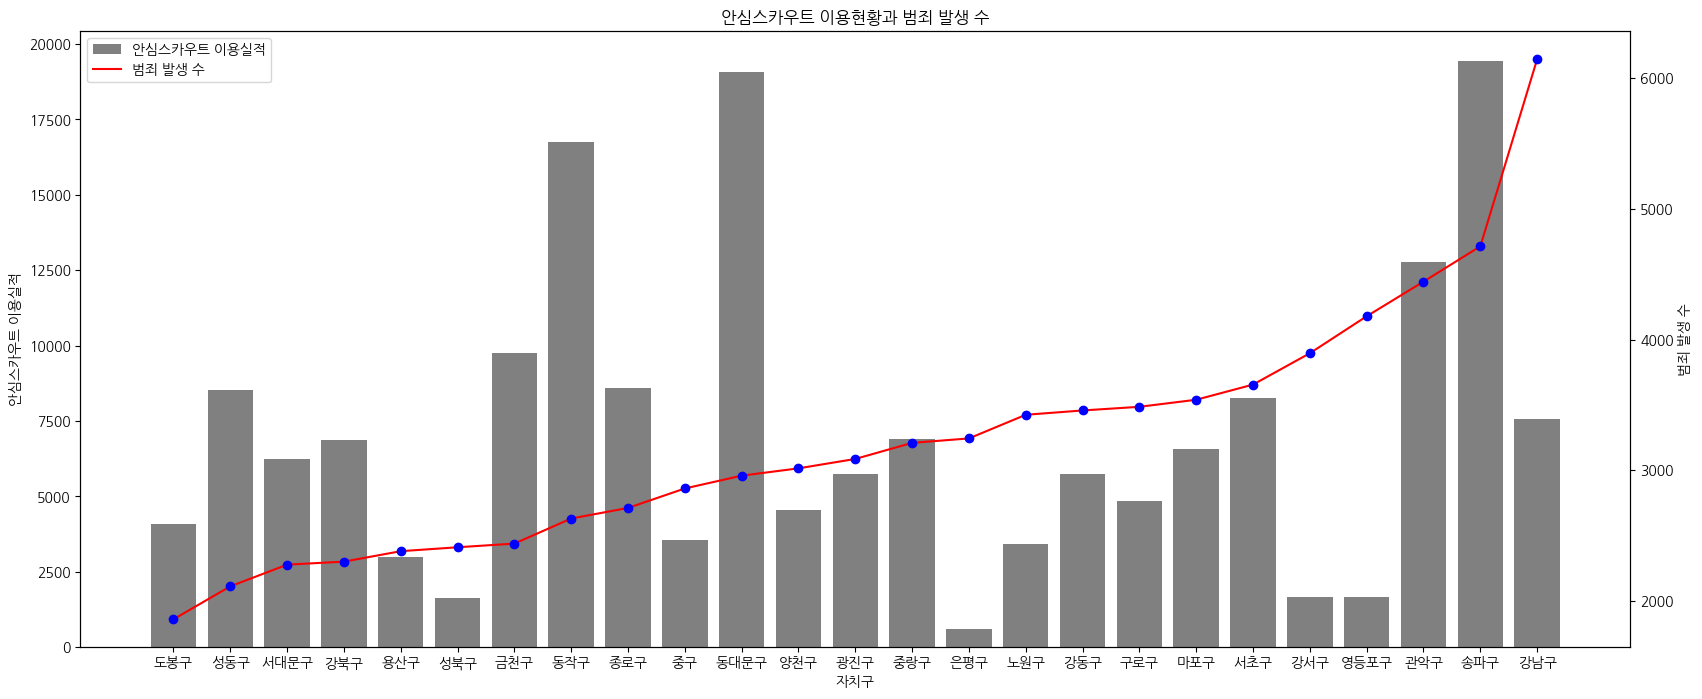

In [ ]:
crime_ansim_data = pd.merge(crime_data, ansim_data, how='left', on='자치구')
# 데이터 프레임 생성
df = pd.DataFrame(crime_ansim_data)
df = df.sort_values('발생')

# 새로운 figure 생성
fig, ax1 = plt.subplots(figsize=(20,8))

# 막대 그래프 생성
ax1.bar(df['자치구'], df['이용실적'], label='안심스카우트 이용실적', color='grey')
ax1.set_xlabel('자치구')
ax1.set_ylabel('안심스카우트 이용실적')
ax1.tick_params(axis='y')

# 라인 그래프 생성
ax2 = ax1.twinx()
ax2.plot(df['자치구'], df['발생'], label='범죄 발생 수', color='r')
ax2.plot(df['자치구'], df['발생'], 'bo')  # 꼭짓점 추가
ax2.set_ylabel('범죄 발생 수')
ax2.tick_params(axis='y')

# 그래프 제목 설정
plt.title('안심스카우트 이용현황과 범죄 발생 수')

# 그래프 레이블 설정
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

# x축의 라벨을 90도 회전
plt.xticks(rotation=90)

plt.show()


In [ ]:
# 데이터 병합
crime_ansim_data.rename(columns={"자치구": "district", "발생": "cnt", "이용실적": "ansim"}, inplace=True)
crime_ansim_1 = pd.merge(code_seoul_b, crime_ansim_data, on='district')

crime_ansim_1.rename(columns={"행정코드" : "id"}, inplace=True)
seoul_map['id'] = seoul_map['id'].astype(int)
crime_ansim_1['id'] = crime_ansim_1['id'].astype(int)

ansim_merge = pd.merge(seoul_map, crime_ansim_1, on='id')


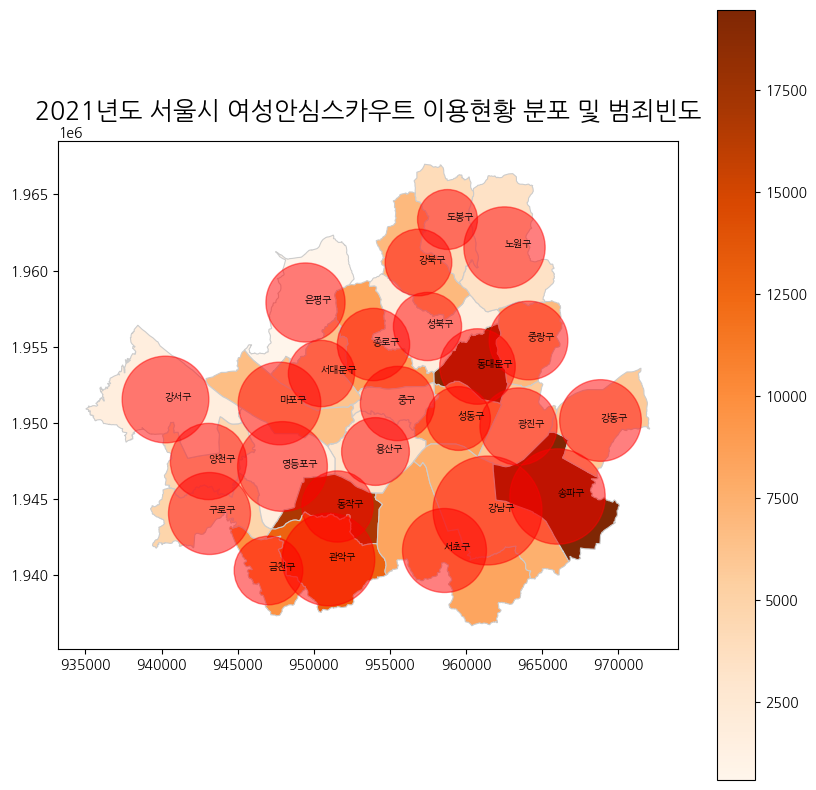

In [ ]:
def scale(count):
    return count * 1  # 원의 크기를 결정하는 계수를 조절할 수 있습니다.

# 지도 데이터를 geopandas 데이터프레임으로 변환
gdf = gpd.GeoDataFrame(ansim_merge)

# 지도 시각화
fig, ax = plt.subplots(1, figsize=(10, 10))
gdf.plot(column='ansim', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for idx, row in gdf.iterrows():
    plt.scatter(x=row['geometry'].centroid.x, y=row['geometry'].centroid.y,
                s=scale(row['cnt']), color='red', alpha=0.5)

# 텍스트 추가
for idx, row in gdf.iterrows():
    plt.text(x=row['geometry'].centroid.x, y=row['geometry'].centroid.y,
             s=row['district'], fontsize=7)

plt.title('2021년도 서울시 여성안심스카우트 이용현황 분포 및 범죄빈도', fontsize=18)
plt.show()


In [ ]:
import statsmodels.formula.api as smf

# 다중 회귀 분석 모델 생성
model = smf.ols(formula='범죄발생수 ~ CCTV_개수 + 가로등_개수 + 공공기관_개수+이용실적', data=gu_total)

# 모델 학습
result = model.fit()

# 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  범죄발생수   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     15.71
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           5.77e-06
Time:                        06:53:17   Log-Likelihood:                -188.67
No. Observations:                  25   AIC:                             387.3
Df Residuals:                      20   BIC:                             393.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    283.5164    563.033      0.504      0.6

이 OLS 회귀 결과는 4개의 예측 변수(CCTV_개수, 가로등_개수, 공공기관_개수, 이용실적)를 사용하여 범죄 발생 수를 예측하는 모델을 설명합니다. 각 항목에 대해 해석해보겠습니다.

R-squared: R-squared 값은 0.759로, 모델이 데이터의 약 75.9%를 설명하고 있다는 것을 의미합니다. 이는 모델의 적합도를 나타내며, 1에 가까울수록 모델이 데이터를 잘 설명하고 있다고 판단할 수 있습니다.
coef: coef는 각 예측 변수의 계수를 의미합니다. 예를 들어, CCTV_개수의 계수는 0.4458로, CCTV_개수가 1 증가할 때마다 범죄 발생 수가 약 0.4458 증가한다는 것을 의미합니다.
P>|t|: P>|t|는 각 예측 변수의 계수가 통계적으로 유의미한지를 판단하는 p-value를 나타냅니다. 일반적으로 p-value가 0.05 미만일 경우, 해당 변수는 통계적으로 유의미하다고 판단합니다. 이 경우, CCTV_개수와 가로등_개수는 p-value가 0.05 미만으로, 범죄 발생 수를 예측하는 데 유의미한 변수라고 볼 수 있습니다. 반면에, 공공기관_개수와 이용실적은 p-value가 0.05 이상으로, 범죄 발생 수를 예측하는 데 유의미하지 않은 변수일 가능성이 있습니다.

Cond. No.: 이는 다중공선성을 나타내는 지표로, 매우 큰 값(여기서는 6.52e+04)이 나온다면 예측 변수 간에 강한 상관관계가 있음을 의미합니다. 이 경우, 다중공선성 문제가 있을 가능성이 있으므로 각 변수 간의 상관관계를 살펴보거나, 변수 선택 방법을 고려할 필요가 있습니다.
위의 해석은 통계적 가정들이 충족되었을 때 유효하므로, 이 모델을 해석하고 사용하기 전에 데이터가 회귀 분석의 가정을 충족하는지(예: 독립성, 동분산성, 정규성 등) 확인해야 합니다.

CCTV_개수: 이 변수의 계수는 약 0.4458로, 다른 변수들이 고정되어 있을 때, CCTV의 개수가 한 개 증가하면 범죄 발생 수는 약 0.4458만큼 증가한다는 것을 의미합니다. 이 변수의 p-value는 0.001로 0.05보다 작으므로 통계적으로 유의미하다고 볼 수 있습니다. 즉, CCTV의 개수는 범죄 발생 수에 영향을 미치는 중요한 요소로 볼 수 있습니다.
가로등_개수: 가로등의 개수는 범죄 발생 수에 대해 약 0.2193의 계수를 가지며, 이는 가로등의 개수가 한 개 증가할 때마다 범죄 발생 수가 약 0.2193만큼 증가한다는 것을 의미합니다. p-value는 0.000으로, 가로등의 개수도 범죄 발생 수에 유의미한 영향을 미치는 것으로 판단됩니다.
공공기관_개수: 공공기관의 개수는 범죄 발생 수에 대해 약 -11.9506의 계수를 가지며, 이는 공공기관의 개수가 한 개 증가할 때마다 범죄 발생 수가 약 11.9506만큼 감소한다는 것을 의미합니다. 그러나 이 변수의 p-value는 0.667로, 0.05보다 크므로 이 결과는 통계적으로 유의미하지 않다고 볼 수 있습니다. 즉, 공공기관의 개수가 범죄 발생 수에 미치는 영향은 확실하지 않습니다.
이용실적: 이용실적은 범죄 발생 수에 대해 약 0.0194의 계수를 가지며, 이는 이용실적이 한 단위 증가할 때마다 범죄 발생 수가 약 0.0194만큼 증가한다는 것을 의미합니다. 하지만 이 변수의 p-value는 0.376으로, 0.05보다 크므로 이 결과는 통계적으로 유의미하지 않다고 볼 수 있습니다. 따라서 이용실적이 범죄 발생 수에 미치는 영향은 확실하지 않습니다.

            범죄발생수    가로등_개수   CCTV_개수   공공기관_개수      이용실적       인원수
범죄발생수    1.000000  0.765245  0.610311  0.452057  0.154806  0.216259
가로등_개수   0.765245  1.000000  0.294880  0.543320  0.189040  0.061455
CCTV_개수  0.610311  0.294880  1.000000  0.308802 -0.132275  0.294789
공공기관_개수  0.452057  0.543320  0.308802  1.000000  0.203802  0.278256
이용실적     0.154806  0.189040 -0.132275  0.203802  1.000000  0.166325
인원수      0.216259  0.061455  0.294789  0.278256  0.166325  1.000000


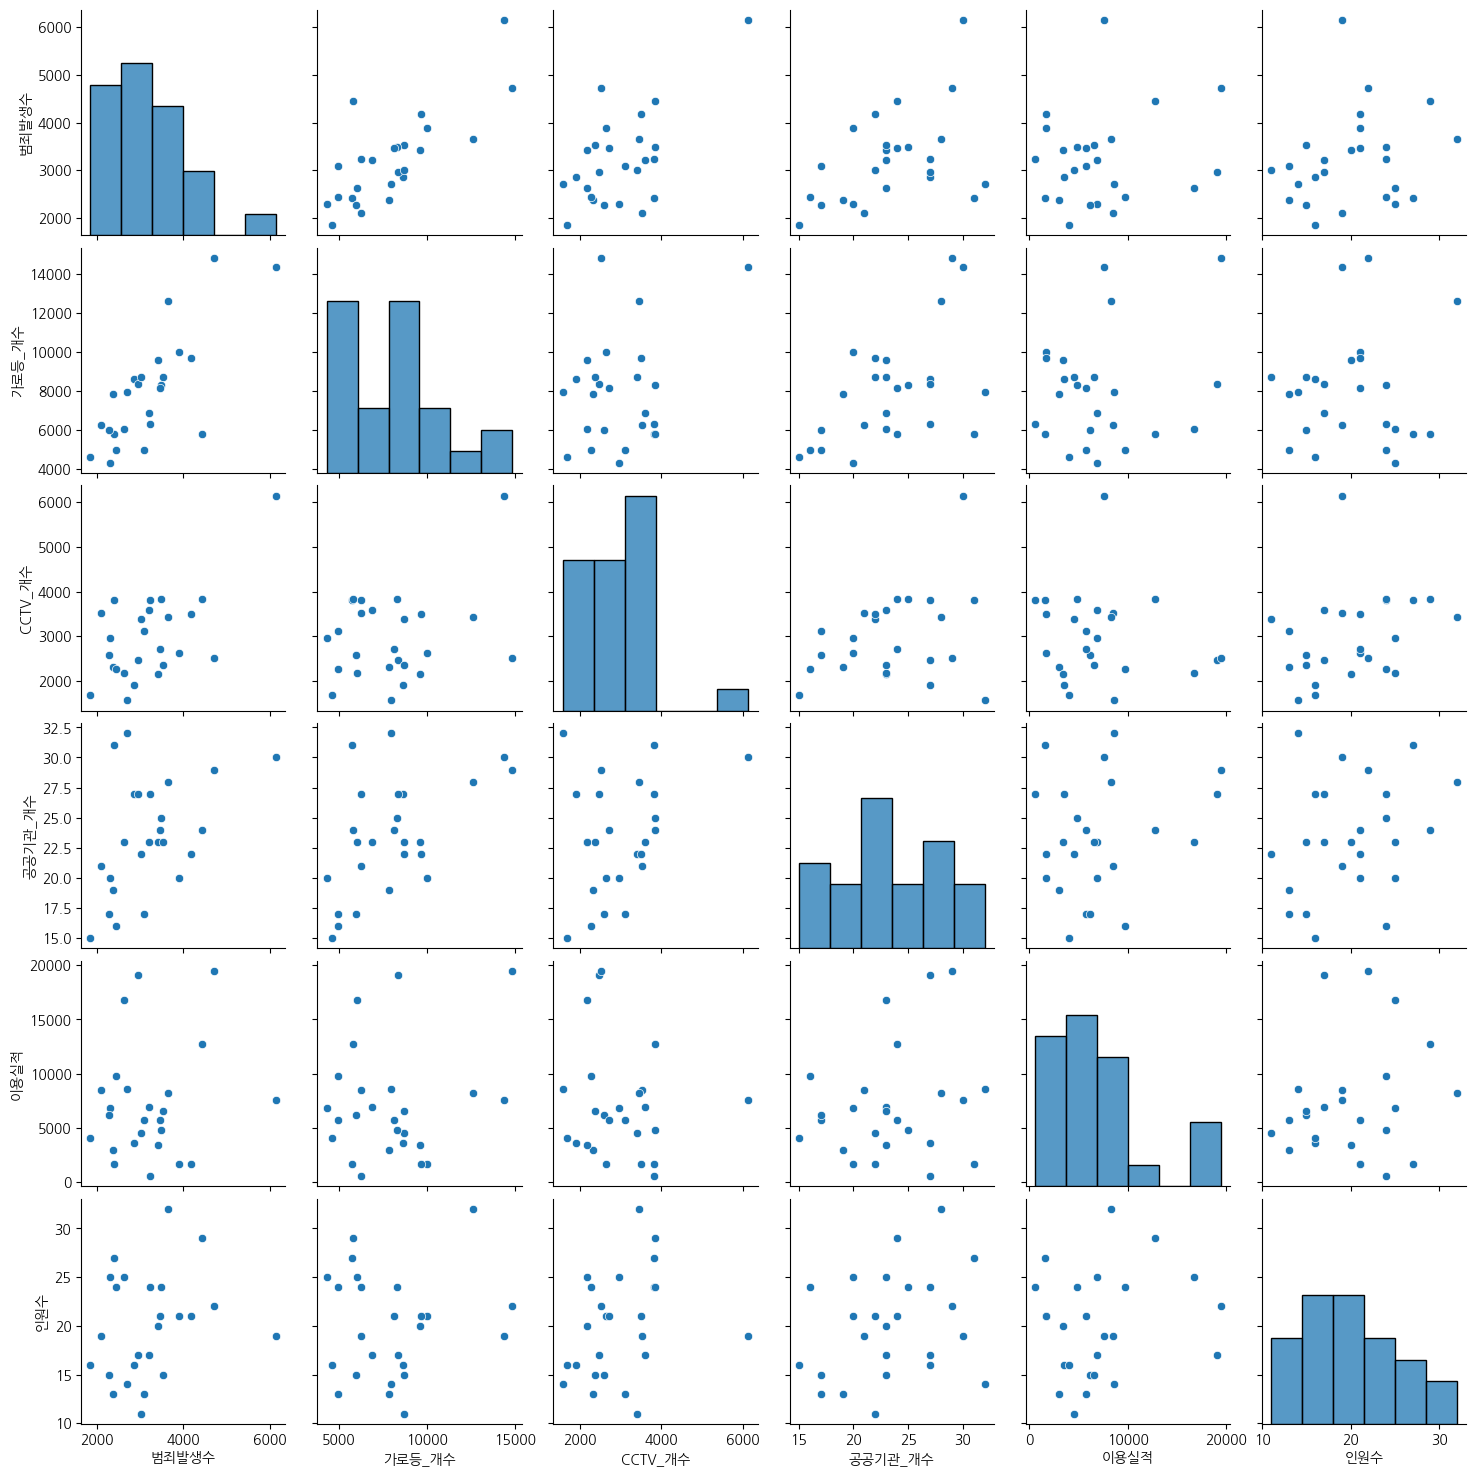

    principal component1  principal component2  principal component3  \
0            1460.663604           -568.127455          -1378.873097   
1           -3401.355021            883.028123          -1362.287328   
2           -4123.626711            162.719077          -1041.876482   
3            1086.807768          -2040.627539            466.789580   
4           -1808.914921          -2672.668908            745.500187   
5           11890.638650          -1519.205498           -217.295699   
6            -391.511890           -918.112908            790.200206   
7           -5771.577798          -1392.152112            728.580113   
8            -808.119874          -3665.907730            473.210407   
9           -3521.251882          -3264.379166           -999.470268   
10          -3400.422711           1990.490105          -1131.825111   
11          -6708.302540           -527.242219            926.338983   
12          -1192.766524          -2039.177927           -288.85

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 데이터 로드
gu_total_1= pd.read_excel("통합데이터.xlsx")
gu_total_1 = gu_total_1.drop(gu_total_1.columns[0], axis=1)
gu_total_1 = gu_total_1.dropna()

# 상관계수 확인
print(gu_total_1.corr())

# 산점도 행렬 그리기
sns.pairplot(gu_total_1)
plt.show()

# PCA 분석
pca = PCA(n_components=4)  # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(gu_total_1)
principalDf = pd.DataFrame(data=printcipalComponents, columns=['principal component1', 'principal component2', 'principal component3', 'principal component4'])
print(principalDf)


In [ ]:
sorted_data = year_cctv.sort_values(by='2022년', ascending=False)

print(sorted_data)

     자치구  2015년  2016년  2017년  2018년  2019년  2020년  2021년  2022년
22   강남구   2319   3447   4232   4834   5459   5796   6143   6495
11   은평구   1719   2075   2310   2669   3141   3431   3822   4103
20   관악구   1496   2048   2611   3247   3388   3652   3833   4029
7    성북구   1035   1534   1940   2542   3238   3440   3815   4014
16   구로구   1407   1719   2231   2819   3074   3455   3842   4013
18  영등포구    904   1140   1429   2055   2093   3250   3508   3896
6    중랑구    751    898   1047   1203   2250   3165   3592   3856
14   양천구   1898   2026   2367   2655   2928   3136   3393   3627
3    성동구   1089   1328   2103   2390   2833   3162   3519   3627
4    광진구    638    657   1112   1586   2308   2481   3111   3370
8    강북구    608    840    841   1159   1656   2337   2960   3184
21   서초구   1548   1785   2169   2582   2938   3175   3442   3180
15   강서구    801    960   1164   1386   1858   2346   2637   3151
24   강동구    670    863   1134   1596   1871   2475   2720   3086
12  서대문구    952   1179   

cctv 설치수 상위 5개 구와 하위 5개 구의 cctv 설치율 증가에 따른 범죄 발생건 변화 추이를 그래프로 출력


In [ ]:
# '자치구'를 인덱스로 설정
year_cctv.set_index('자치구', inplace=True)
year_crime.set_index('자치구', inplace=True)


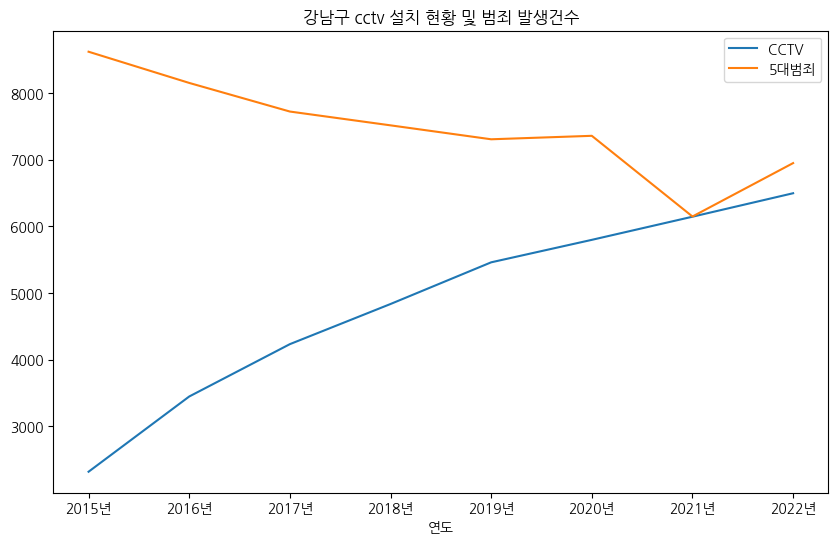

In [ ]:
# 강남구 데이터만 추출
cctv_gangnam = year_cctv.loc['강남구'].astype(int)
crime_gangnam = year_crime.loc['강남구'].astype(int)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(year_cctv.columns, cctv_gangnam, label='CCTV')
plt.plot(year_crime.columns, crime_gangnam, label='5대범죄')
plt.xlabel('연도')
plt.title('강남구 cctv 설치 현황 및 범죄 발생건수')
plt.legend()
plt.show()


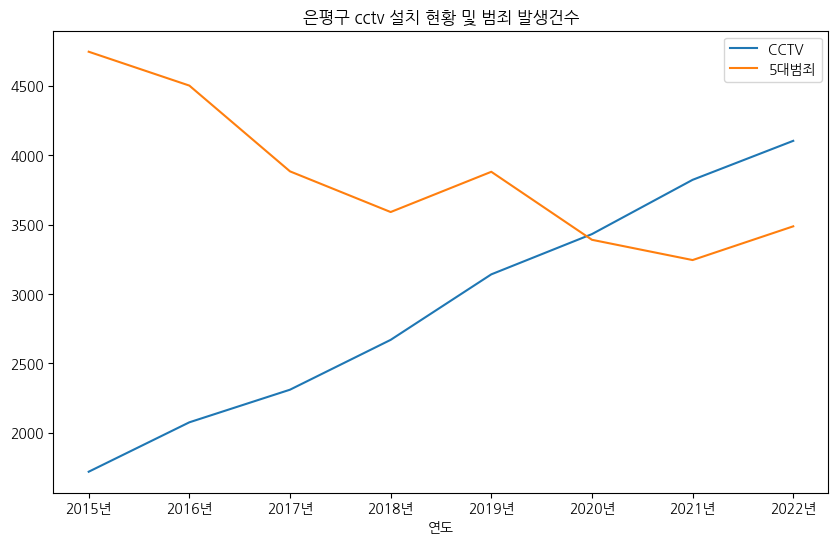

In [ ]:
# 은평구 데이터만 추출
cctv_eunpyeong = year_cctv.loc['은평구'].astype(int)
crime_eunpyeong= year_crime.loc['은평구'].astype(int)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(year_cctv.columns, cctv_eunpyeong, label='CCTV')
plt.plot(year_crime.columns, crime_eunpyeong, label='5대범죄')
plt.xlabel('연도')
plt.title('은평구 cctv 설치 현황 및 범죄 발생건수')
plt.legend()
plt.show()


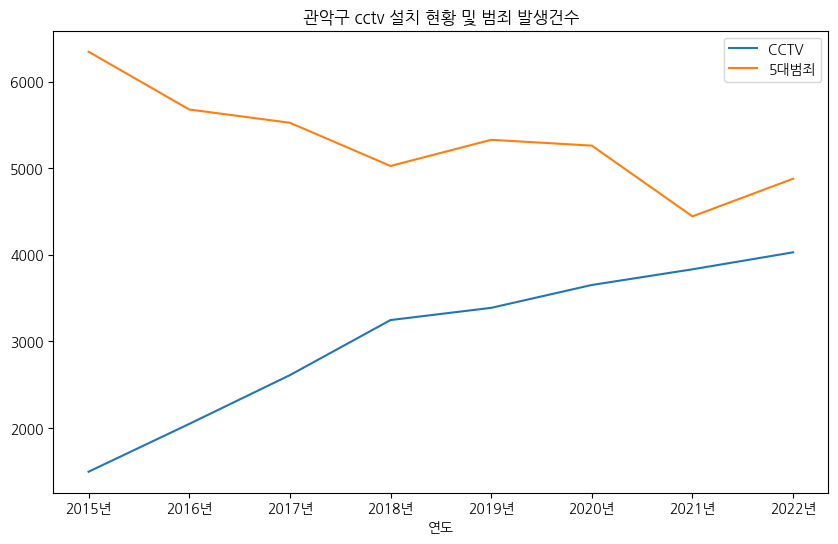

In [ ]:
# 관악구 데이터만 추출
cctv_gwanak = year_cctv.loc['관악구'].astype(int)
crime_gwanak = year_crime.loc['관악구'].astype(int)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(year_cctv.columns, cctv_gwanak, label='CCTV')
plt.plot(year_crime.columns, crime_gwanak, label='5대범죄')
plt.xlabel('연도')
plt.title('관악구 cctv 설치 현황 및 범죄 발생건수')
plt.legend()
plt.show()


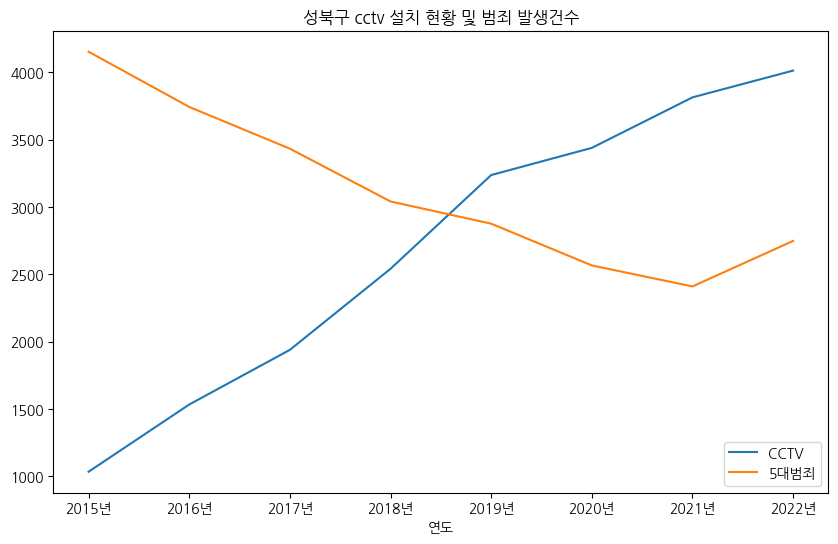

In [ ]:
# 성북구 데이터만 추출
cctv_seongbuk = year_cctv.loc['성북구'].astype(int)
crime_seongbuk = year_crime.loc['성북구'].astype(int)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(year_cctv.columns, cctv_seongbuk, label='CCTV')
plt.plot(year_crime.columns, crime_seongbuk, label='5대범죄')
plt.xlabel('연도')
plt.title('성북구 cctv 설치 현황 및 범죄 발생건수')
plt.legend()
plt.show()


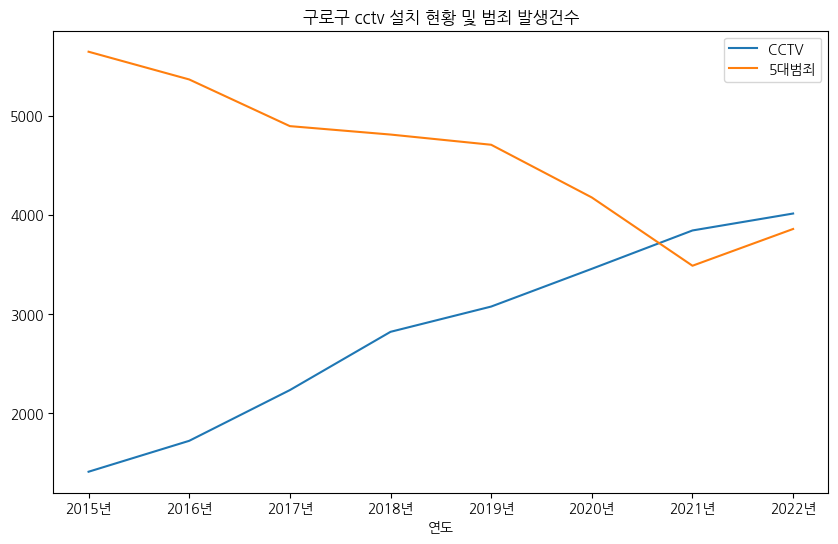

In [ ]:
# 구로구 데이터만 추출
cctv_guro = year_cctv.loc['구로구'].astype(int)
crime_guro = year_crime.loc['구로구'].astype(int)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(year_cctv.columns, cctv_guro, label='CCTV')
plt.plot(year_crime.columns, crime_guro, label='5대범죄')
plt.xlabel('연도')
plt.title('구로구 cctv 설치 현황 및 범죄 발생건수')
plt.legend()
plt.show()


2015년~2021년까지 꾸준히 범죄율이 감소하는 와중 2022년에 공통적으로 상승세를 보임.
2022년 실외 마스크 착용 의무가 해제되는 등 코로나 방역 조치가 완화되고 일상 회복 쪽으로 방향이 바뀐것이 범죄율 증가에 영향을 미친 것으로 생각함


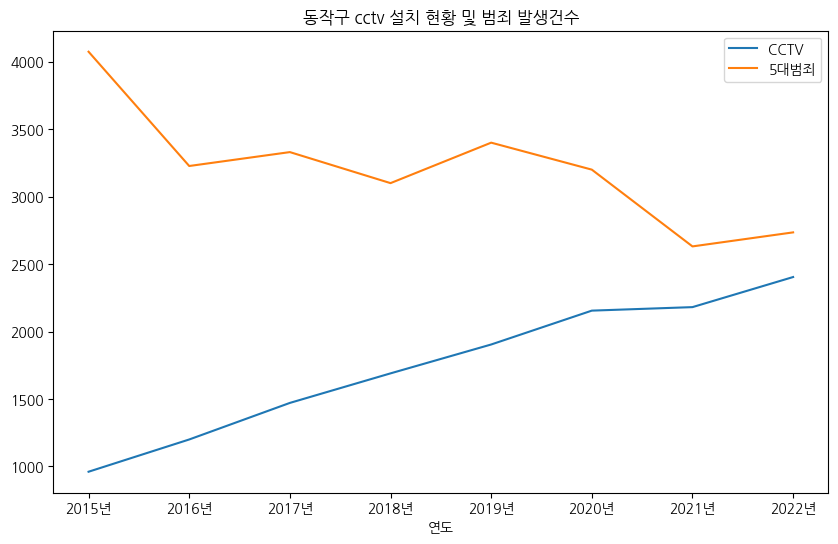

In [ ]:
# 동작구 데이터만 추출
cctv_dongjak = year_cctv.loc['동작구'].astype(int)
crime_dongjak = year_crime.loc['동작구'].astype(int)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(year_cctv.columns, cctv_dongjak, label='CCTV')
plt.plot(year_crime.columns, crime_dongjak, label='5대범죄')
plt.xlabel('연도')
plt.title('동작구 cctv 설치 현황 및 범죄 발생건수')
plt.legend()
plt.show()


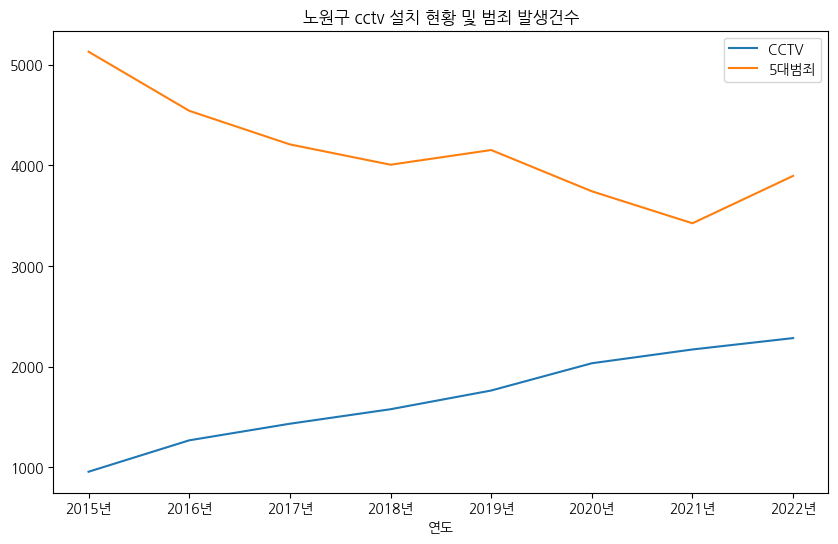

In [ ]:
# 노원구 데이터만 추출
cctv_nowon = year_cctv.loc['노원구'].astype(int)
crime_nowon = year_crime.loc['노원구'].astype(int)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(year_cctv.columns, cctv_nowon, label='CCTV')
plt.plot(year_crime.columns, crime_nowon, label='5대범죄')
plt.xlabel('연도')
plt.title('노원구 cctv 설치 현황 및 범죄 발생건수')
plt.legend()
plt.show()

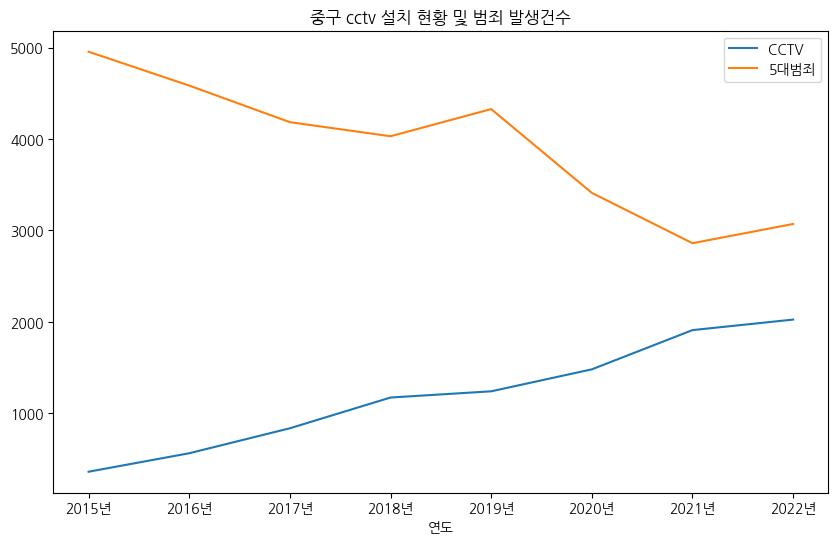

In [ ]:
# 중구 데이터만 추출
cctv_junggu = year_cctv.loc['중구'].astype(int)
crime_junggu = year_crime.loc['중구'].astype(int)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(year_cctv.columns, cctv_junggu, label='CCTV')
plt.plot(year_crime.columns, crime_junggu, label='5대범죄')
plt.xlabel('연도')
plt.title('중구 cctv 설치 현황 및 범죄 발생건수')
plt.legend()
plt.show()

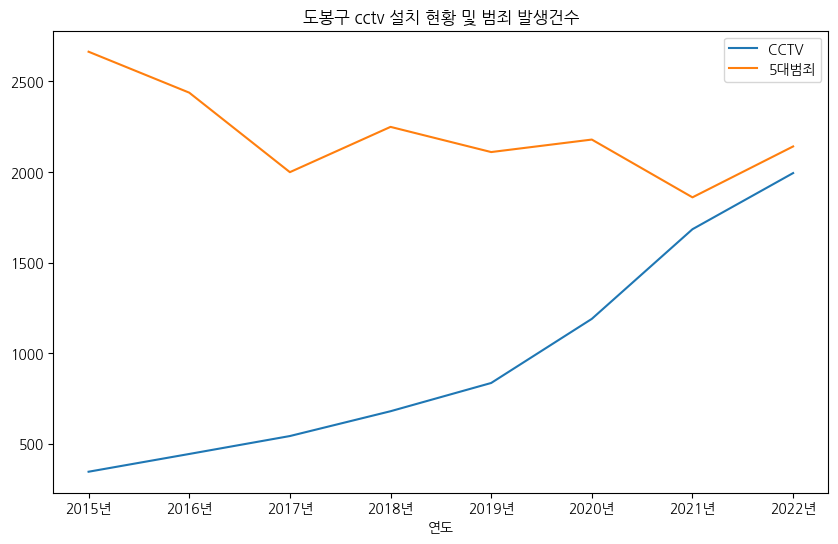

In [ ]:
# 도봉구 데이터만 추출
cctv_dobong = year_cctv.loc['도봉구'].astype(int)
crime_dobong = year_crime.loc['도봉구'].astype(int)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(year_cctv.columns, cctv_dobong, label='CCTV')
plt.plot(year_crime.columns, crime_dobong, label='5대범죄')
plt.xlabel('연도')
plt.title('도봉구 cctv 설치 현황 및 범죄 발생건수')
plt.legend()
plt.show()

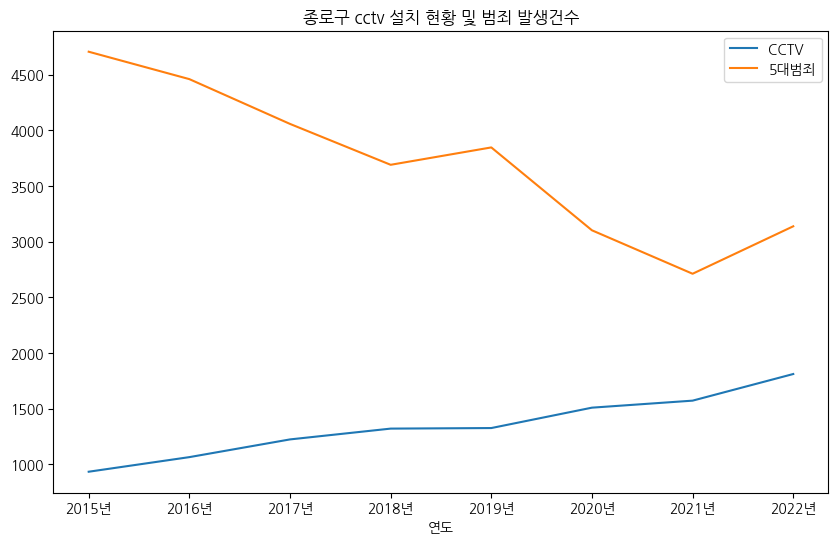

In [ ]:
# 종로구 데이터만 추출
cctv_jongro = year_cctv.loc['종로구'].astype(int)
crime_jongro= year_crime.loc['종로구'].astype(int)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(year_cctv.columns, cctv_jongro, label='CCTV')
plt.plot(year_crime.columns, crime_jongro, label='5대범죄')
plt.xlabel('연도')
plt.title('종로구 cctv 설치 현황 및 범죄 발생건수')
plt.legend()
plt.show()

In [ ]:
print(year_population)


     자치구   2015년   2016년   2017년   2018년   2019년   2020년   2021년   2022년
0    종로구  163822  161922  164257  163026  161869  158996  153789  152211
1     중구  134329  134409  134593  135633  136488  134635  131787  130785
2    용산구  247909  245102  244444  245090  245185  244645  237285  233284
3    성동구  305065  307161  312711  316463  308979  300505  292672  288234
4    광진구  375180  372104  372298  371063  366972  360109  352627  351252
5   동대문구  373824  370312  366011  364338  363023  357014  352006  353601
6    중랑구  418620  415677  412780  408147  402024  399562  391885  390140
7    성북구  469560  461617  455407  447687  454744  447056  440142  441984
8    강북구  334426  330704  328002  322915  317695  311569  302563  297702
9    도봉구  353241  350272  346234  341649  335631  327361  319373  313989
10   노원구  578221  571212  558075  548160  537303  527032  514946  508014
11   은평구  502578  495937  491202  487666  484546  484043  477173  470602
12  서대문구  323105  325871  325028  323080  323171  3

In [ ]:
print(year_cctv)

      2015년  2016년  2017년  2018년  2019년  2020년  2021년  2022년
자치구                                                         
종로구     935   1066   1225   1322   1327   1510   1573   1812
중구      363    565    838   1174   1242   1482   1911   2026
용산구    1398   1689   1831   1888   1915   2058   2321   2531
성동구    1089   1328   2103   2390   2833   3162   3519   3627
광진구     638    657   1112   1586   2308   2481   3111   3370
동대문구   1202   1425   1535   1775   2061   2166   2471   2592
중랑구     751    898   1047   1203   2250   3165   3592   3856
성북구    1035   1534   1940   2542   3238   3440   3815   4014
강북구     608    840    841   1159   1656   2337   2960   3184
도봉구     345    443    542    679    835   1189   1684   1994
노원구     956   1268   1433   1577   1763   2034   2171   2284
은평구    1719   2075   2310   2669   3141   3431   3822   4103
서대문구    952   1179   1525   1764   2100   2499   2591   2928
마포구     623    970   1328   1703   2011   2268   2372   2500
양천구    1898   2026   236

In [ ]:
print(year_crime)

      2015년  2016년  2017년  2018년  2019년  2020년  2021년  2022년
자치구                                                         
종로구    4705   4459   4057   3690   3846   3102   2712   3138
중구     4954   4584   4184   4030   4327   3411   2861   3071
용산구    3820   4137   4060   3411   3313   2969   2381   2967
성동구    3358   3026   2767   2457   2512   2362   2112   2194
광진구    5909   5322   4646   3915   4011   3601   3087   3619
동대문구   4720   4787   3975   3680   3692   3401   2959   3253
중랑구    5193   5041   4571   4288   4268   3726   3210   3599
성북구    4154   3744   3434   3042   2877   2567   2411   2749
강북구    4257   4229   3393   3437   3838   2770   2301   2832
도봉구    2664   2438   1999   2249   2110   2179   1860   2141
노원구    5130   4543   4209   4007   4153   3743   3425   3896
은평구    4745   4501   3883   3590   3880   3390   3244   3487
서대문구   4029   3665   3113   2802   2943   2533   2278   2374
마포구    5854   5873   5278   5172   4842   3688   3540   4096
양천구    4528   4112   388

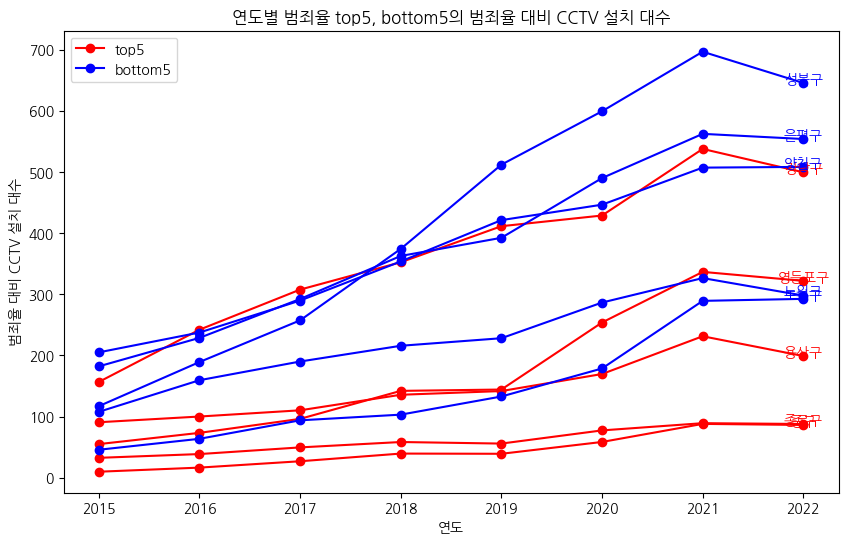

In [ ]:
# 연도별 데이터를 저장할 빈 데이터프레임 생성
cctv_vs_crime_yearly = pd.DataFrame()
crime_rate_yearly = pd.DataFrame()

year_cctv = year_cctv.copy()
year_crime = year_crime.copy()
year_population = year_population.copy()

# 각 연도에 대해 계산 수행
for year in range(2015, 2023):
    # 해당 연도의 데이터 선택
    cctv_year = year_cctv.set_index('자치구')[f'{year}년']
    crime_year = year_crime.set_index('자치구')[f'{year}년']
    population_year = year_population.set_index('자치구')[f'{year}년']

    # 범죄율 계산
    crime_rate = crime_year / population_year * 1000

    # 계산한 범죄율을 연도별로 저장
    crime_rate_yearly = pd.concat([crime_rate_yearly, crime_rate], axis=1)

    # 범죄율 대비 CCTV 비율 계산
    cctv_vs_crime = cctv_year / crime_rate

    # 계산 결과를 데이터프레임에 저장
    cctv_vs_crime_yearly = pd.concat([cctv_vs_crime_yearly, cctv_vs_crime], axis=1)

# 컬럼명을 연도로 변경
cctv_vs_crime_yearly.columns = range(2015, 2023)
crime_rate_yearly.columns = range(2015, 2023)

# 범죄율이 가장 높은 5개 구 선택
top5_gu = crime_rate_yearly.mean(axis=1).sort_values(ascending=False).index[:5]

# 범죄율이 가장 낮은 5개 구 선택
bottom5_gu = crime_rate_yearly.mean(axis=1).sort_values().index[:5]

# 라인 그래프로 나타내기
plt.figure(figsize=(10, 6))

for i, gu in enumerate(top5_gu):
    line, = plt.plot(cctv_vs_crime_yearly.loc[gu], marker='o', color='red')
    plt.text(2022, cctv_vs_crime_yearly.loc[gu, 2022] - 0.05, gu, color = line.get_color(), ha='center')
    # 첫 번째 구에 대해서만 범례를 추가
    if i == 0:
        line.set_label('top5')

for i, gu in enumerate(bottom5_gu):
    line, = plt.plot(cctv_vs_crime_yearly.loc[gu], marker='o', color='blue')
    plt.text(2022, cctv_vs_crime_yearly.loc[gu, 2022] - 0.05, gu, color = line.get_color(), ha='center')
    # 첫 번째 구에 대해서만 범례를 추가
    if i == 0:
        line.set_label('bottom5')

plt.title('연도별 범죄율 top5, bottom5의 범죄율 대비 CCTV 설치 대수')
plt.xlabel('연도')
plt.ylabel('범죄율 대비 CCTV 설치 대수')
plt.legend()
plt.show()


In [ ]:
sorted_data = year_streetlamp.sort_values(by='2022년', ascending=False)

print(sorted_data)

     자치구  2015년  2016년  2017년  2018년  2019년  2020년  2021년  2022년
23   송파구  11225  12054  12586  13263  13520  14184  14822  14822
22   강남구  12184  13826  14193  14193  13788  14326  14351  14351
21   서초구  11143  11622  11699  12691  12793  12588  12593  12593
15   강서구   6540   6569   6691   6682   8919   9552   9994   9994
18  영등포구   8679   9157   9209   9500   9278   9535   9653   9653
10   노원구   8745   9267   9308   9270   9510   9443   9573   9573
13   마포구   7428   7645   7941   8177   8313   8392   8696   8901
14   양천구   7209   7206   7198   7833   7970   8583   8717   8717
1     중구   8651   8621   8641   8694   8665   8550   8619   8619
5   동대문구   7890   8019   8096   8149   8211   8342   8359   8359
16   구로구   7365   7419   7413   7490   7529   8199   8270   8270
24   강동구   7232   7411   7891   7982   7477   7952   8126   8126
0    종로구   8988   8988   8986   9220   9265   8818   7947   7947
2    용산구   6977   7206   7291   7248   7637   7838   7838   7838
6    중랑구   5392   5682   

In [ ]:
# '자치구'를 인덱스로 설정
year_streetlamp.set_index('자치구', inplace=True)
year_crime.set_index('자치구', inplace=True)


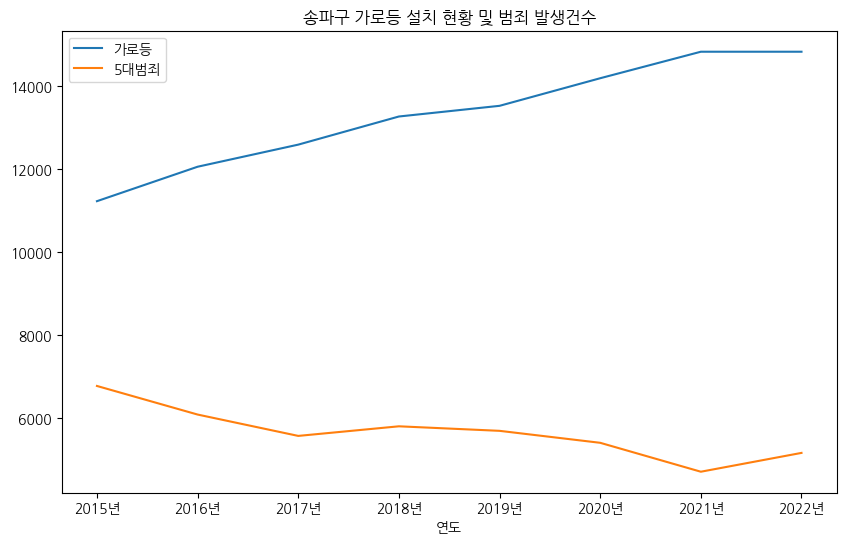

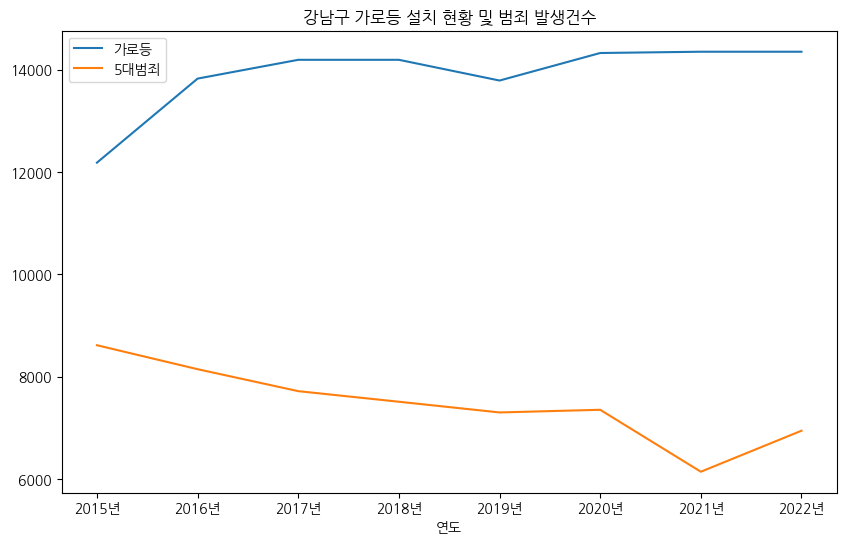

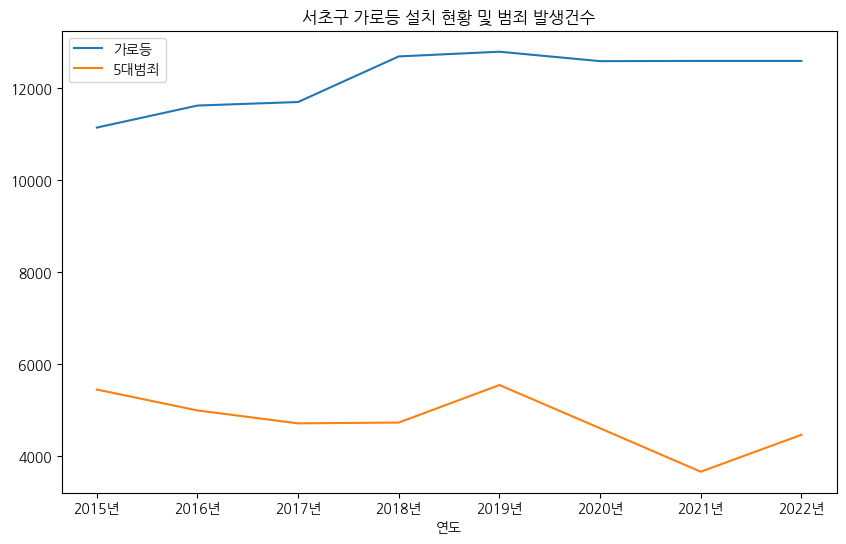

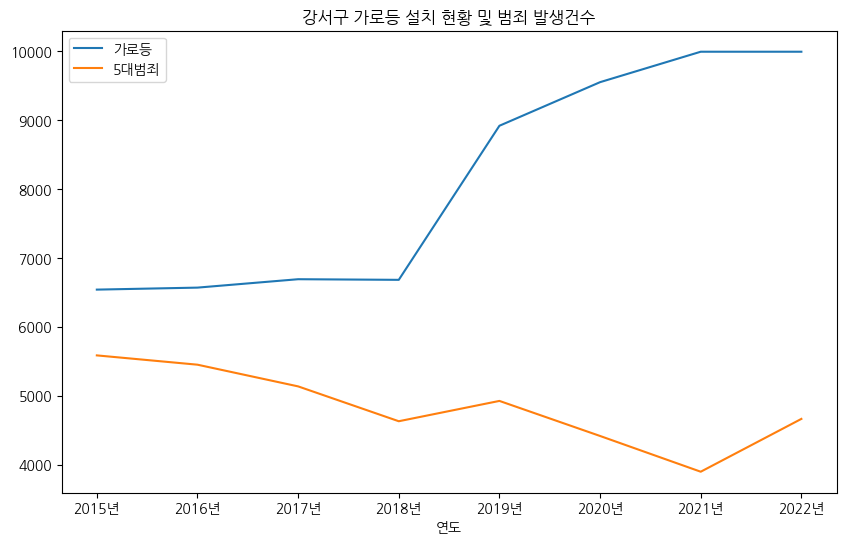

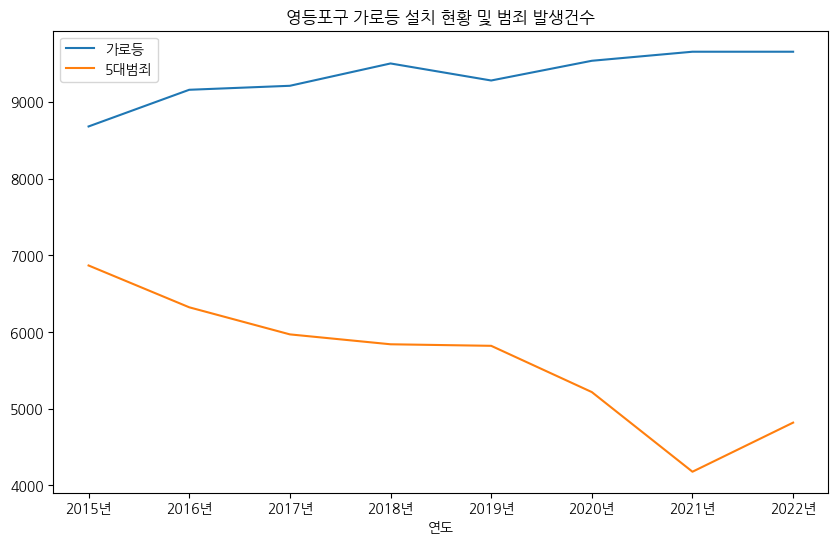

In [ ]:
# 상위 5개 구
top5_gu = ['송파구', '강남구', '서초구', '강서구', '영등포구']

# 각 구에 대한 그래프 그리기
for gu in top5_gu:
    # 해당 구의 데이터만 추출
    streetlamp_gu = year_streetlamp.loc[gu].astype(int)
    crime_gu = year_crime.loc[gu].astype(int)

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(year_streetlamp.columns, streetlamp_gu, label='가로등')
    plt.plot(year_crime.columns, crime_gu, label='5대범죄')
    plt.xlabel('연도')
    plt.title(f'{gu} 가로등 설치 현황 및 범죄 발생건수')
    plt.legend()
    plt.show()


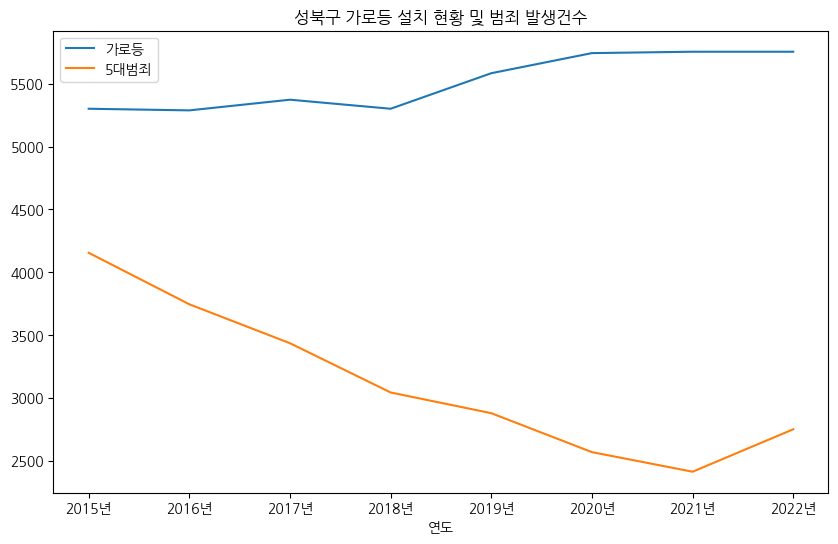

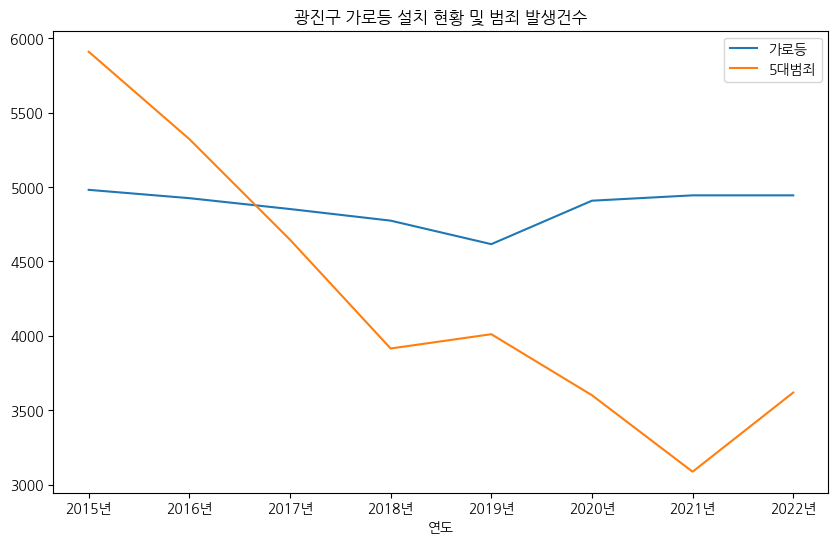

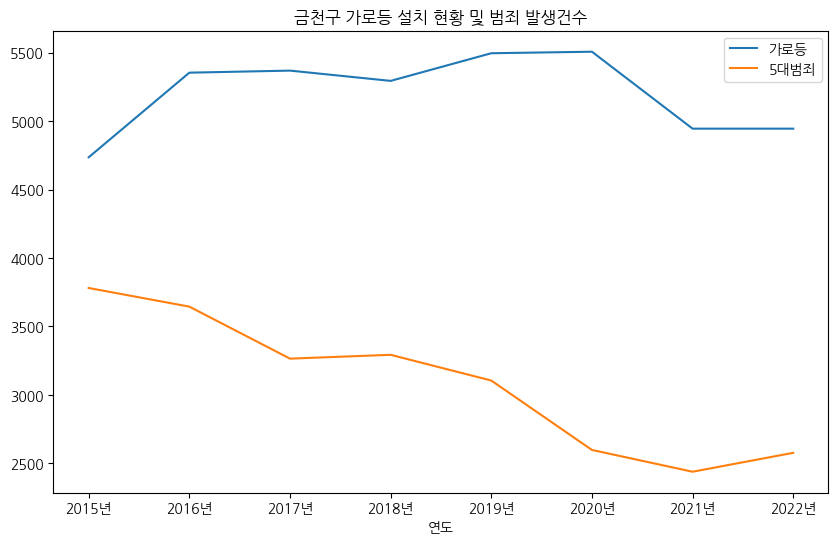

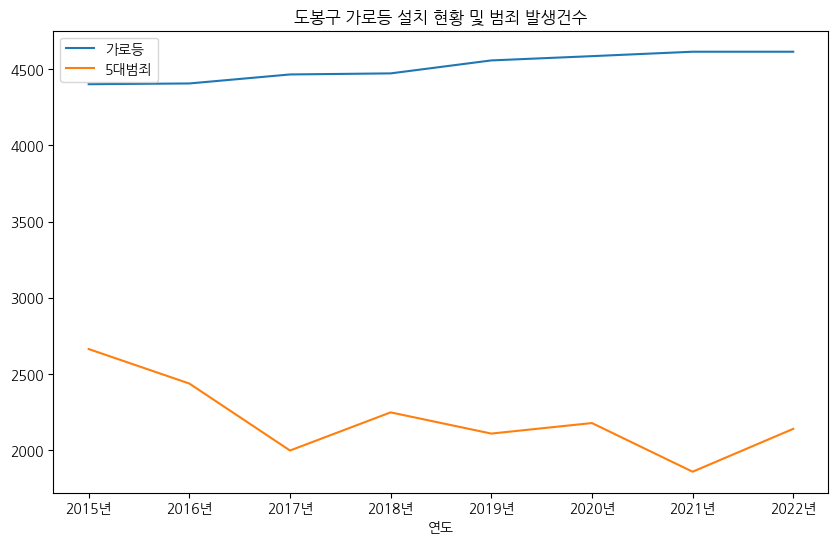

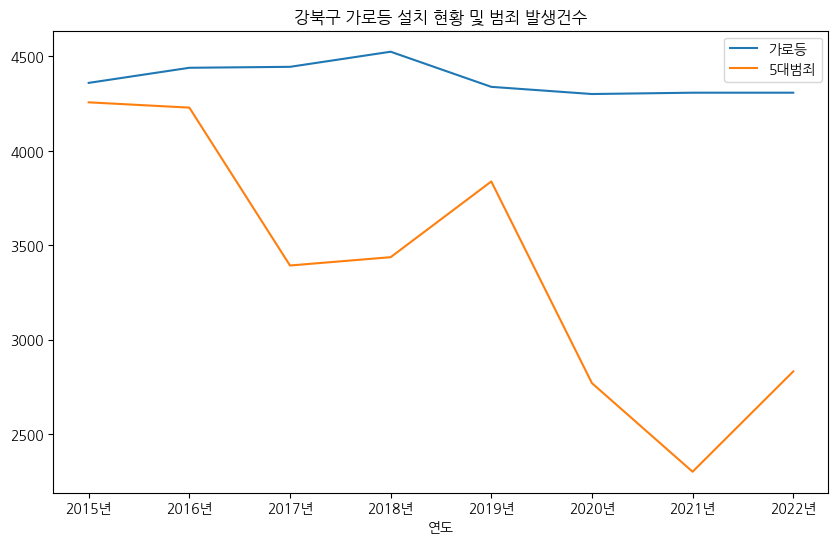

In [ ]:
# 하위 5개 구
bottom5_gu = ['성북구', '광진구', '금천구', '도봉구', '강북구']

# 각 구에 대한 그래프 그리기
for gu in bottom5_gu:
    # 해당 구의 데이터만 추출
    streetlamp_gu = year_streetlamp.loc[gu].astype(int)
    crime_gu = year_crime.loc[gu].astype(int)

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(year_streetlamp.columns, streetlamp_gu, label='가로등')
    plt.plot(year_crime.columns, crime_gu, label='5대범죄')
    plt.xlabel('연도')
    plt.title(f'{gu} 가로등 설치 현황 및 범죄 발생건수')
    plt.legend()
    plt.show()

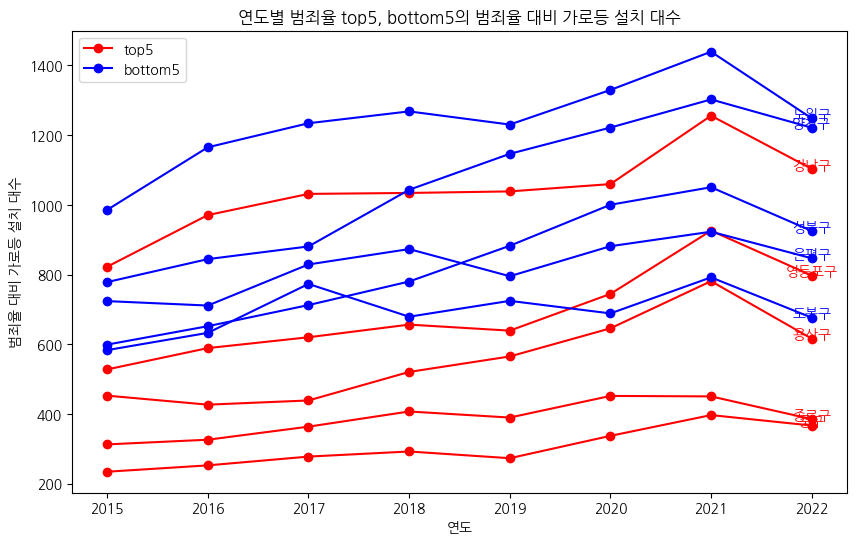

In [ ]:
# 연도별 데이터를 저장할 빈 데이터프레임 생성
streetlamp_vs_crime_yearly = pd.DataFrame()

year_streetlamp = year_streetlamp.copy()
year_crime = year_crime.copy()
year_population = year_population.copy()

# 각 연도에 대해 계산 수행
for year in range(2015, 2023):
    # 해당 연도의 데이터 선택
    streetlamp_year = year_streetlamp.set_index('자치구')[f'{year}년']
    crime_year = year_crime.set_index('자치구')[f'{year}년']
    population_year = year_population.set_index('자치구')[f'{year}년']

    # 범죄율 계산
    crime_rate = crime_year / population_year * 1000

    # 범죄율 대비 가로등 비율 계산
    streetlamp_vs_crime = streetlamp_year / crime_rate

    # 계산 결과를 데이터프레임에 저장
    streetlamp_vs_crime_yearly = pd.concat([streetlamp_vs_crime_yearly, streetlamp_vs_crime], axis=1)

# 컬럼명을 연도로 변경
streetlamp_vs_crime_yearly.columns = range(2015, 2023)

# 범죄율이 가장 높은 5개 구 선택
top5_gu = crime_rate_yearly.mean(axis=1).sort_values(ascending=False).index[:5]

# 범죄율이 가장 낮은 5개 구 선택
bottom5_gu = crime_rate_yearly.mean(axis=1).sort_values().index[:5]


# 라인 그래프로 나타내기
plt.figure(figsize=(10, 6))

for i, gu in enumerate(top5_gu):
    line, = plt.plot(streetlamp_vs_crime_yearly.loc[gu], marker='o', color='red')
    plt.text(2022, streetlamp_vs_crime_yearly.loc[gu, 2022] - 0.05, gu, color = line.get_color(), ha='center')
    # 첫 번째 구에 대해서만 범례를 추가
    if i == 0:
        line.set_label('top5')

for i, gu in enumerate(bottom5_gu):
    line, = plt.plot(streetlamp_vs_crime_yearly.loc[gu], marker='o', color='blue')
    plt.text(2022, streetlamp_vs_crime_yearly.loc[gu, 2022] - 0.05, gu, color = line.get_color(), ha='center')
    # 첫 번째 구에 대해서만 범례를 추가
    if i == 0:
        line.set_label('bottom5')

plt.title('연도별 범죄율 top5, bottom5의 범죄율 대비 가로등 설치 대수')
plt.xlabel('연도')
plt.ylabel('범죄율 대비 가로등 설치 대수')
plt.legend()
plt.show()


In [ ]:
sorted_data = year_ansim.sort_values(by='2022년', ascending=False)

print(sorted_data)

     자치구  2015년  2016년  2017년  2018년  2019년  2020년  2021년  2022년
23   송파구  24221  13297  11019   9401   9309  13992  19450  13487
5   동대문구   5588   7259  13704  15771  20776  19420  19085  13011
21   서초구  22185  15102  34498  51088  43556   9483   8265  11227
19   동작구   8350  15268  19935  18431  18766  14233  16761  10274
6    중랑구   8448   7815   8001  10163  14696   8015   6889   8373
20   관악구  18463  14403  15918  16706  15730  10286  12780   7858
3    성동구   8043  13170  18766  19584  17510  10872   8518   5743
4    광진구   6533   5990   6183   6206   6099   3215   5733   5141
24   강동구  12797  15910  18930  16740  14436   8089   5738   5063
22   강남구   3341   2448   6863   8793   6306   5191   7563   4943
7    성북구   6789   7600  13486  14427  16836   7220   1647   4233
12  서대문구   7227   9579  12226  10469  11164   6898   6225   4163
8    강북구  10507  13833  17368  18446  18282  10573   6867   3764
9    도봉구   3467   4800  11499  10491  12602   7092   4070   3503
13   마포구   1202   1039   

In [ ]:
# '자치구'를 인덱스로 설정
year_ansim.set_index('자치구', inplace=True)
year_crime.set_index('자치구', inplace=True)

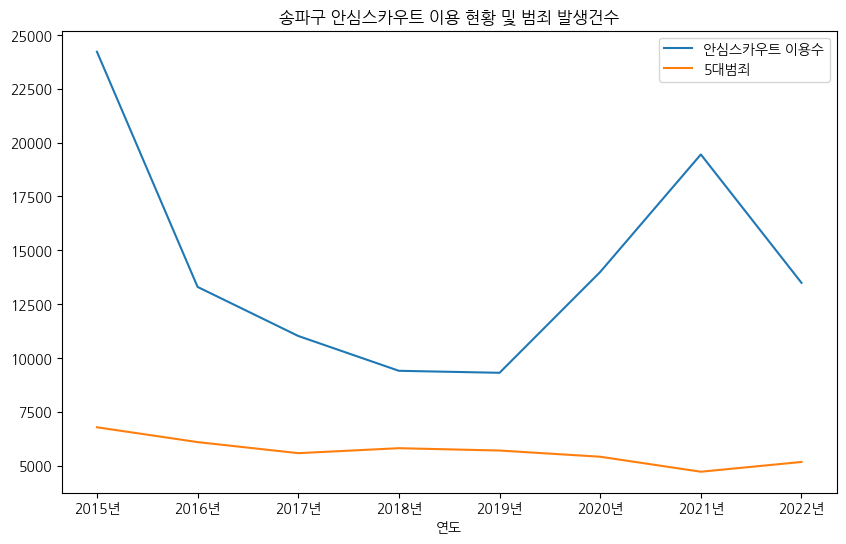

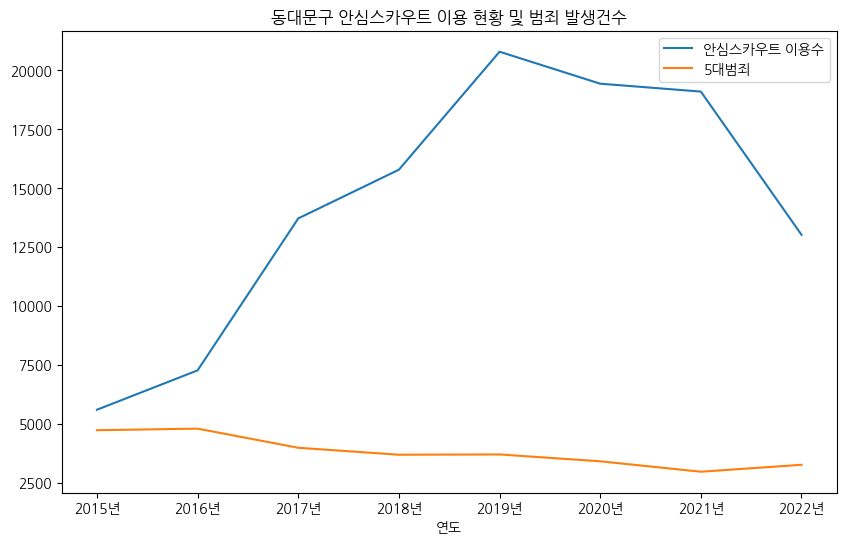

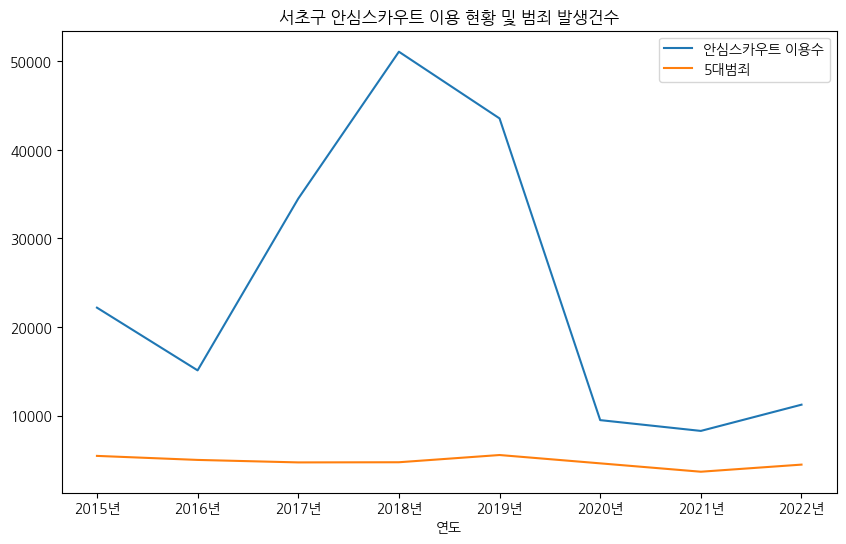

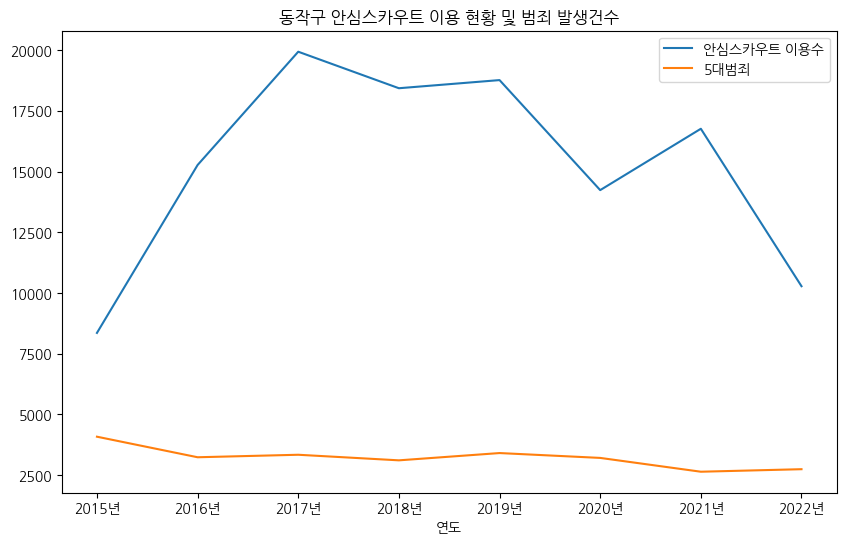

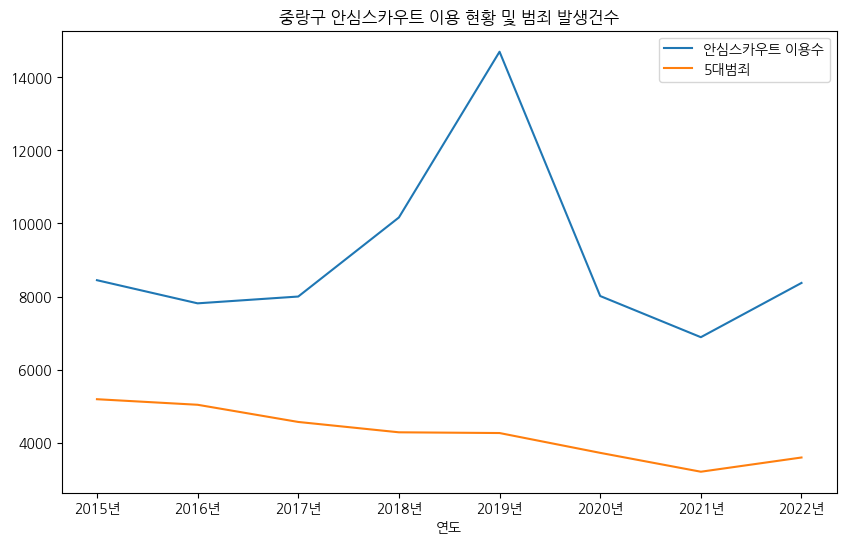

In [ ]:
# 상위 5개 구
top5_gu = ['송파구', '동대문구', '서초구', '동작구', '중랑구']

# 각 구에 대한 그래프 그리기
for gu in top5_gu:
    # 해당 구의 데이터만 추출
    ansim_gu = year_ansim.loc[gu].astype(int)
    crime_gu = year_crime.loc[gu].astype(int)

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(year_ansim.columns, ansim_gu, label='안심스카우트 이용수')
    plt.plot(year_crime.columns, crime_gu, label='5대범죄')
    plt.xlabel('연도')
    plt.title(f'{gu} 안심스카우트 이용 현황 및 범죄 발생건수')
    plt.legend()
    plt.show()


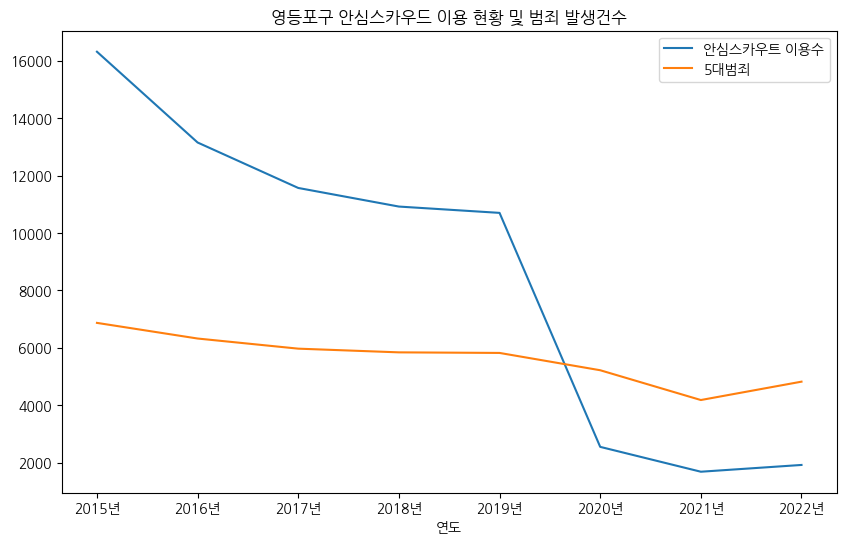

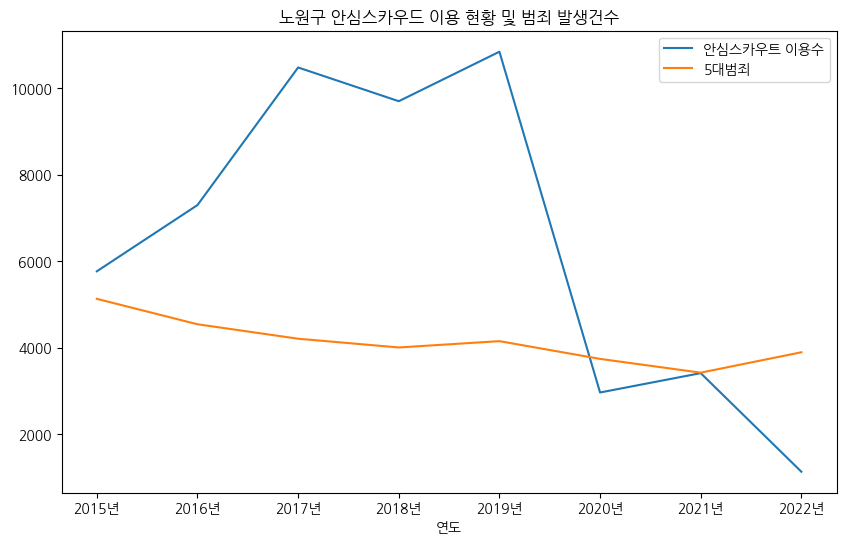

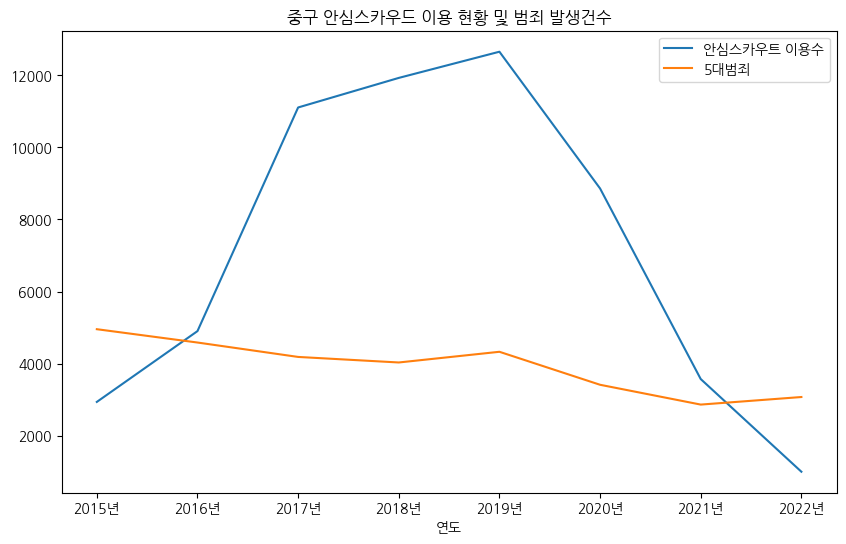

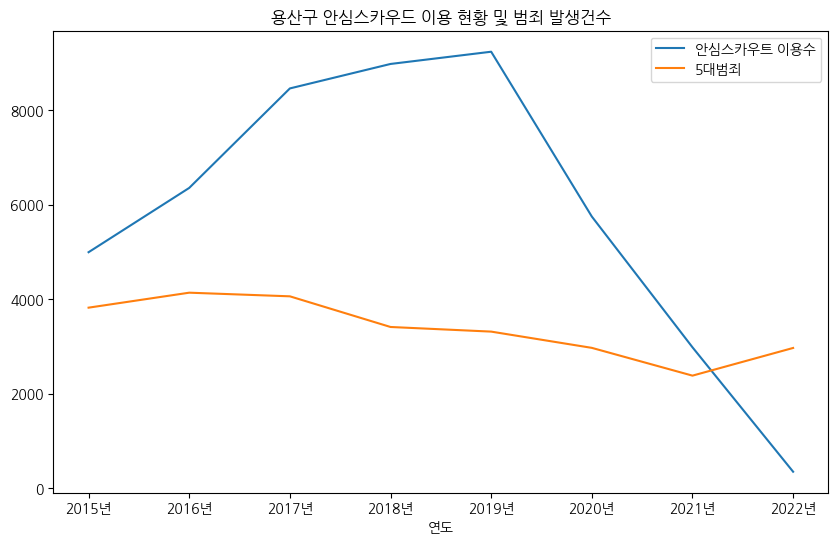

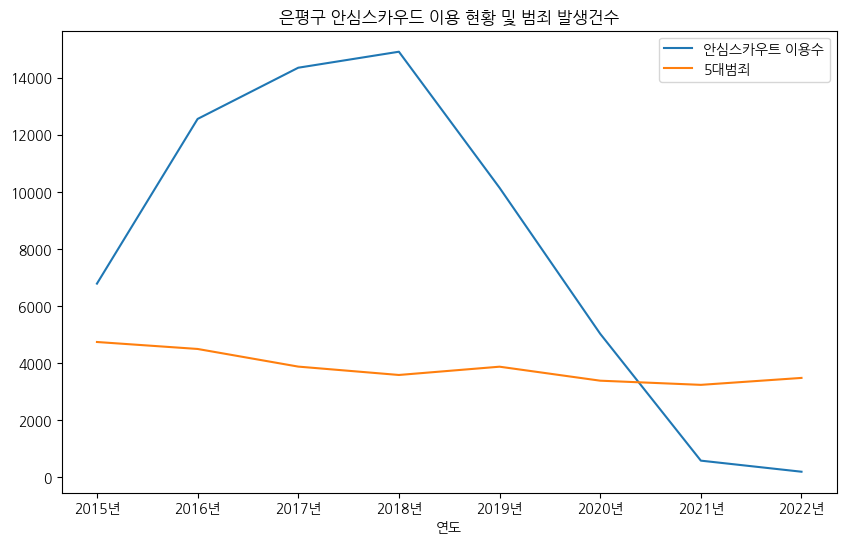

In [ ]:
# 하위 5개 구
bottom5_gu = ['영등포구', '노원구', '중구', '용산구', '은평구']

# 각 구에 대한 그래프 그리기
for gu in bottom5_gu:
    # 해당 구의 데이터만 추출
    ansim_gu = year_ansim.loc[gu].astype(int)
    crime_gu = year_crime.loc[gu].astype(int)

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(year_ansim.columns, ansim_gu, label='안심스카우트 이용수')
    plt.plot(year_crime.columns, crime_gu, label='5대범죄')
    plt.xlabel('연도')
    plt.title(f'{gu} 안심스카우드 이용 현황 및 범죄 발생건수')
    plt.legend()
    plt.show()

안심스카우트 이용현황과 범죄율의 상관관계는 없는 것으로 보임


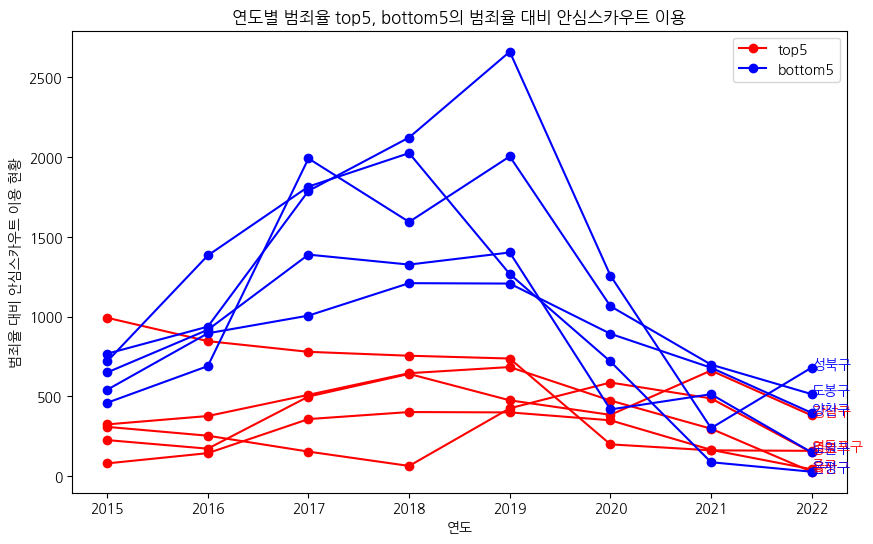

In [ ]:
# 연도별 데이터를 저장할 빈 데이터프레임 생성
ansim_vs_crime_yearly = pd.DataFrame()

year_ansim = year_ansim.copy()
year_crime = year_crime.copy()
year_population = year_population.copy()

# 각 연도에 대해 계산 수행
for year in range(2015, 2023):
    # 해당 연도의 데이터 선택
    ansim_year = year_ansim.set_index('자치구')[f'{year}년']
    crime_year = year_crime.set_index('자치구')[f'{year}년']
    population_year = year_population.set_index('자치구')[f'{year}년']

    # 범죄율 계산
    crime_rate = crime_year / population_year * 1000

    # 범죄율 대비 가로등 비율 계산
    ansim_vs_crime = ansim_year / crime_rate

    # 계산 결과를 데이터프레임에 저장
    ansim_vs_crime_yearly = pd.concat([ansim_vs_crime_yearly, ansim_vs_crime], axis=1)

# 컬럼명을 연도로 변경
ansim_vs_crime_yearly.columns = range(2015, 2023)

# 범죄율이 가장 높은 5개 구 선택
top5_gu = crime_rate_yearly.mean(axis=1).sort_values(ascending=False).index[:5]

# 범죄율이 가장 낮은 5개 구 선택
bottom5_gu = crime_rate_yearly.mean(axis=1).sort_values().index[:5]


# 라인 그래프로 나타내기
plt.figure(figsize=(10, 6))

for i, gu in enumerate(top5_gu):
    line, = plt.plot(ansim_vs_crime_yearly.loc[gu], marker='o', color='red')
    plt.text(2022, ansim_vs_crime_yearly.loc[gu, 2022] - 0.05, gu, color = line.get_color(), ha='left')
    # 첫 번째 구에 대해서만 범례를 추가
    if i == 0:
        line.set_label('top5')

for i, gu in enumerate(bottom5_gu):
    line, = plt.plot(ansim_vs_crime_yearly.loc[gu], marker='o', color='blue')
    plt.text(2022, ansim_vs_crime_yearly.loc[gu, 2022] - 0.05, gu, color = line.get_color(), ha='left')
    # 첫 번째 구에 대해서만 범례를 추가
    if i == 0:
        line.set_label('bottom5')

plt.title('연도별 범죄율 top5, bottom5의 범죄율 대비 안심스카우트 이용')
plt.xlabel('연도')
plt.ylabel('범죄율 대비 안심스카우트 이용 현황')
plt.legend()
plt.show()


bottom5의 경우, 범죄율 대비 안심스카우트 이용 수가 높아 안심스카우트 활동이 범죄율 감소에 유의미한 영향을 미친다고 생각할 수 있음. 안심스카우트 이용수가 2020년을 기점으로 큰 하락세를 보이는데, 코로나 19로 인한 야외활동 감소로 인한 영향으로 생각할 수 있음.